In [1]:
import warnings
import numpy as np
import scipy as si
import sympy as sp
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
plt.rcParams['text.usetex'] = True
plt.rcParams["figure.figsize"] = (9,4)
plt.rcParams['font.size'] = 20
plt.rcParams['legend.fontsize'] = 16

In [2]:
m,n,x,y,P = sp.symbols('m n x y P')

$\text{Legendre’s differential equation}$ has the form                                                                                  
$\qquad\qquad \displaystyle(1-x^2)\ddot{y} -2x\dot{y} + n(n+1)y = 0$

$ \displaystyle P_n(x)= \frac{1}{2^n n!}\frac{d^n}{dx^n}(x^2 - 1)^n$

$ \displaystyle P_0(x)=1$

$ \displaystyle P_1(x)=x$

$ \displaystyle P_2(x)=\frac{1}{2}(3x^2-1)$

$ \displaystyle P_3(x)=\frac{1}{2}(5x^3-3x)$

$ \displaystyle P_4(x)=\frac{1}{8}(35x^4-30x^2+3)$

$ \displaystyle P_5(x)=\frac{1}{8}(63x^5-70x^3+15x)$

The generating function equation for the Legendre polynomials $P_n(x)$ is defined by the equation

$\displaystyle (1 − 2xh + h^2)^{−1/2} = \sum^∞_{n=0}P_n(x)h^n$

we differentiate above eqn. with respect to $h$ to yield

or , $\displaystyle(x − h)(1 − 2xh + h^2)^{(−1/2)-1} =\sum_n nP_n(x)h^{n−1}$

or , $\displaystyle(x − h)(1 − 2xh + h^2)^{(−1/2)} =(1 − 2xh + h^2)\sum_n nP_n(x)h^{n−1}$

or , $\displaystyle (x − h) \sum_n P_n(x)h^n =(1 − 2xh + h^2)\sum_n nP_n(x)h^{n−1}$

or , $\displaystyle x\sum_n P_n(x)h^n − h\sum_n P_n(x)h^n =\sum_n nP_n(x)h^{n−1} − 2xh\sum_n nP_n(x)h^{n−1} + h^2\sum_n nP_n(x)h^{n−1}$

or , $\displaystyle \sum_n xP_n(x)h^n − \sum_n P_n(x)h^{n+1} =\sum_n nP_n(x)h^{n−1} − \sum_n {2} x nP_n(x)h^{n−1+1} + \sum_n nP_n(x)h^{n−1+2}$

or , $\displaystyle \sum_n xP_n(x)h^n − \sum_n P_n(x)h^{n+1} =\sum_n nP_n(x)h^{n−1} − \sum_n {2} x nP_n(x)h^{n} + \sum_n nP_n(x)h^{n+1}$

or , $\displaystyle \sum_n xP_n(x)h^n − \sum_n P_{n-1}(x)h^{(n-1)+1} =\sum_n (n+1)P_{n+1}(x)h^{(n+1)−1} − \sum_n {2} x nP_n(x)h^{n} + \sum_n (n-1)P_{n-1}(x)h^{(n-1)+1}$

or , $\displaystyle \sum_n xP_n(x)h^n − \sum_n P_{n-1}(x)h^{n} =\sum_n (n+1)P_{n+1}(x)h^{n} − \sum_n  {2} x nP_n(x)h^{n} + \sum_n (n-1)P_{n-1}(x)h^{n}$

Equating coefficients of $h^n$ we obtain

or , $ \displaystyle xP_n(x) − P_{n−1}(x) = (n + 1)P_{n+1}(x) − 2xnP_n(x) + (n − 1)P_{n−1}(x)$

or , $ \displaystyle (n+1)P_{n+1}(x)= (2n+1)xP_n(x)-nP_{n-1}(x)$

Let $n\rightarrow (n-1)$

then , $  \displaystyle \{{(n-1)+1}\}P_{(n-1)+1}(x)= \{2(n-1)+1\}xP_{(n-1)}(x)-(n-1)P_{(n-1)-1}(x)$

or , $ \displaystyle {n}{P_{n}(x)= (2n-1)xP_{n-1}(x)-(n-1)P_{n-2}(x)}$

or , $ \displaystyle \boxed{P_{n}(x)= \frac{(2n-1)xP_{n-1}(x)-{(n-1)}P_{n-2}(x)}{n}}$

This is Legendre Polynomials of $1^{st}$ order

$\displaystyle P_{n}(x)=\begin{cases}{1}&n=0\\x&n=1\\{\frac {2n-1}{n}}xP_{n-1}(x)-{\frac {n-1}{n}}P_{n-2}(x)&n\geq 2\,.\end{cases}$

In [3]:
def P(n, x): 
    if n == 0:
        return 1 + 0.*x                                                              # P_0(x)=1
    elif n == 1:
        return x                                                                     # P_1(x)=x
    else:
        return (((2 * n - 1) * x * P(n - 1, x) - (n - 1) * P(n - 2, x)) / float(n))  # P_n(x)

In [10]:
P(0, x)

1

In [11]:
x = np.arange(-1, 1., 0.001)     # Range of x values

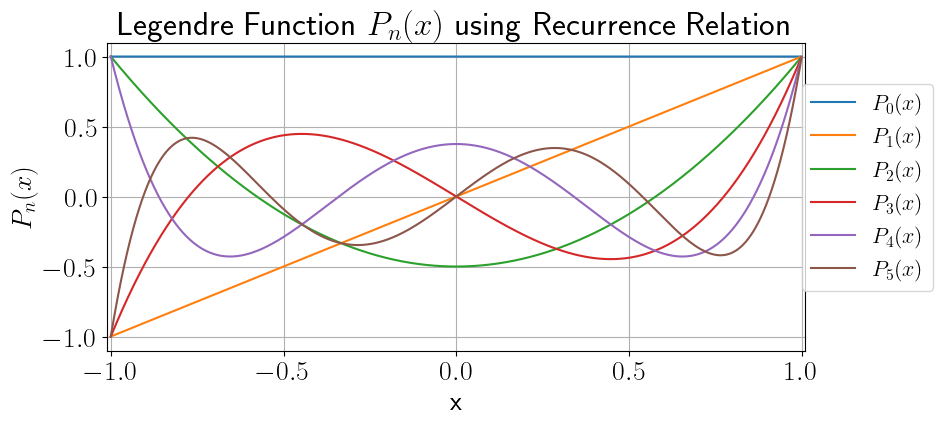

In [12]:
for n in range(0, 5+1):
    plt.plot(x, P(n, x), label=f'$P_{n}(x)$')
plt.xlabel('x')
plt.xlim(x.min()-0.01,x.max()+0.01)
plt.ylabel(r'$P_n(x)$')
plt.title('Legendre Function $P_n(x)$ using Recurrence Relation')
plt.legend(bbox_to_anchor=(1.2, 0.9))
plt.grid(True)
plt.show()

$ \displaystyle (n+1)P_{n+1}(x)= (2n+1)xP_n(x)-nP_{n-1}(x)$

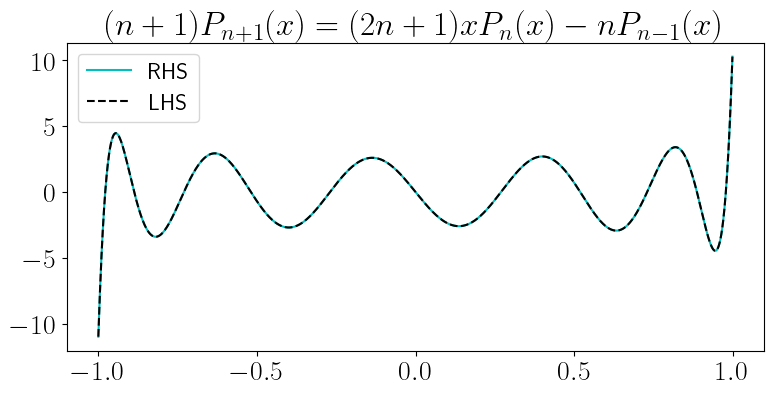

In [7]:
n = 10
RHS = (n + 1) * P(n + 1, x)
LHS = (2 * n + 1) * x * P(n, x) - n * P(n - 1, x)
plt.plot(x, RHS,  'c-',label='RHS')
plt.plot(x, LHS, 'k--',label='LHS')
plt.title(r'$(n+1)P_{n+1}(x)= (2n+1)xP_n(x)-nP_{n-1}(x)$')
plt.legend()
plt.show()

$(1 − x^2)P'_n(x) = n(P_{n−1}(x) − xP_n(x))$

In [8]:
def dP(n,x):
    return n * (P(n - 1, x) - x * P(n, x)) / (1 - x**2)

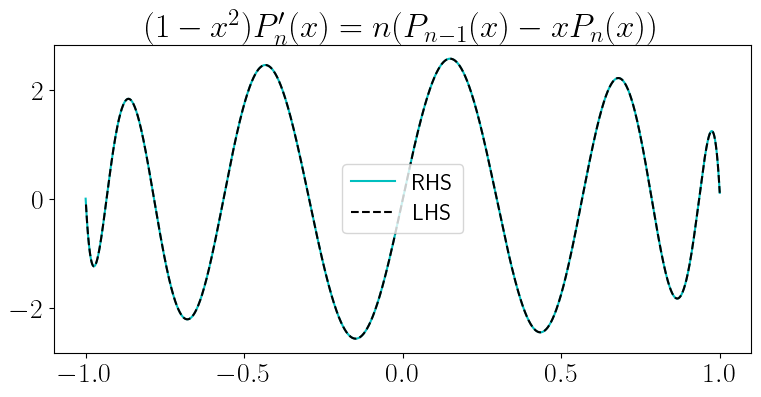

In [9]:
n = 10
LHS = (1 - x**2) * dP(n,x)
RHS = n * (P(n - 1, x) - x * P(n, x))
plt.plot(x, RHS,  'c-',label='RHS')
plt.plot(x, LHS, 'k--',label='LHS')
plt.title(r"$(1 − x^2)P'_n(x) = n(P_{n−1}(x) − xP_n(x))$")
plt.legend()
plt.show()

$P'_{n+1}(x) = (n + 1)P_n(x) + xP'_n(x)$

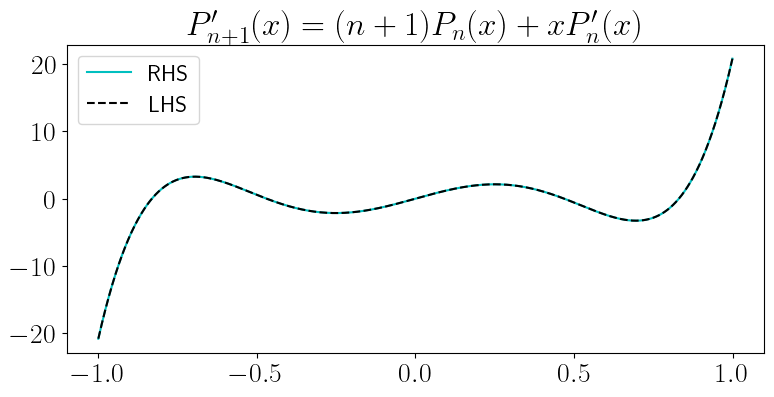

In [10]:
n = 5
LHS = dP(n + 1, x)
RHS = (n + 1) * P(n, x) + x * dP(n, x)
plt.plot(x, RHS,  'c-',label='RHS')
plt.plot(x, LHS, 'k--',label='LHS')
plt.title(r"$P'_{n+1}(x) = (n + 1)P_n(x) + xP'_n(x)$")
plt.legend()
plt.show()

$P'_{n-1}(x) = -nP_n(x) + xP'_n(x)$

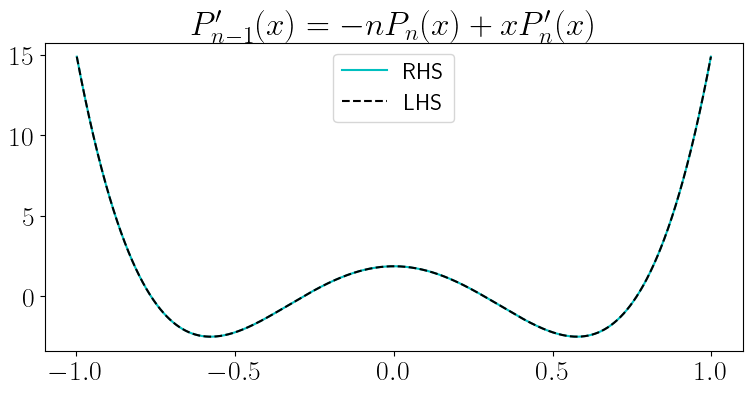

In [11]:
n = 6
LHS = dP(n - 1, x)
RHS = -n * P(n, x) + x * dP(n, x)
plt.plot(x, RHS,  'c-',label='RHS')
plt.plot(x, LHS, 'k--',label='LHS')
plt.title(r"$P'_{n-1}(x) = -nP_n(x) + xP'_n(x)$")
plt.legend()
plt.show()

$(2n + 1)P_n(x) = P'_{n+1}(x)− P'_{n−1}(x)$

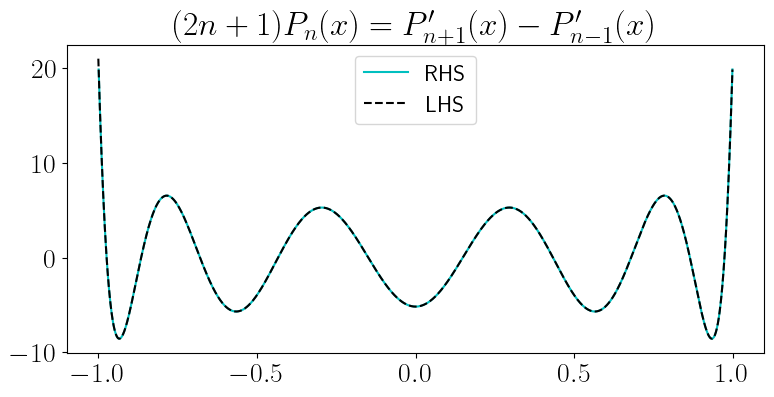

In [12]:
n = 10
LHS = (2 * n + 1) * P(n, x)
RHS = dP(n + 1, x) - dP(n - 1, x)
plt.plot(x, RHS,  'c-',label='RHS')
plt.plot(x, LHS, 'k--',label='LHS')
plt.title(r"$(2n + 1)P_n(x) = P'_{n+1}(x)− P'_{n−1}(x)$")
plt.legend()
plt.show()

$P'_{n+1}(x) + P'_{n−1}(x) = P_n(x) + 2xP'_n(x)$

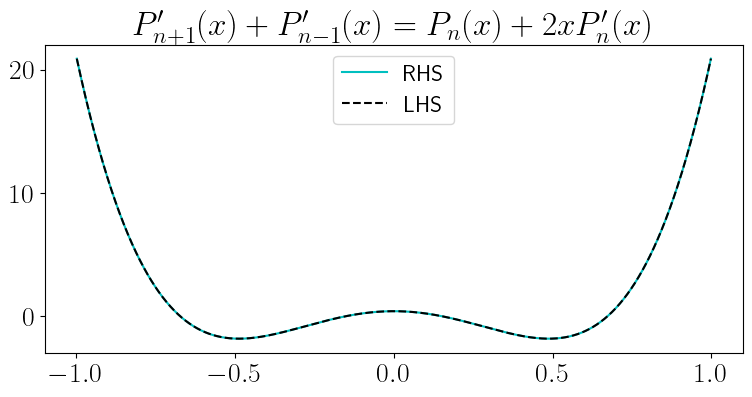

In [13]:
n = 4
LHS = dP(n + 1, x) + dP(n - 1 , x)
RHS = P(n,x) + 2 * x * dP(n,x)
plt.plot(x, RHS,  'c-',label='RHS')
plt.plot(x, LHS, 'k--',label='LHS')
plt.title(r"$P'_{n+1}(x) + P'_{n−1}(x) = P_n(x) + 2xP'_n(x)$")
plt.legend()
plt.show()

This is Legendre Polynomials of $2^{nd}$ order

$\displaystyle Q_{n}(x)=\begin{cases}{\frac {1}{2}}\log {\big( \frac{1+x}{1-x}\big)}&n=0\\{\frac {1}{2}x}\log {\big( \frac {1+x}{1-x}\big)}-1&n=1\\{\frac {2n-1}{n}}xQ_{n-1}(x)-{\frac {n-1}{n}}Q_{n-2}(x)&n\geq 2\,.\end{cases}$

In [14]:
def Q(n, x): 
    if n == 0:
        return 0.5 * np.log((1 + x) / (1 - x))                                       # Q_0(x)
    elif n == 1:
        return 0.5 * x * np.log((1 + x) / (1 - x)) - 1                               # Q_1(x)
    else:
        return (((2 * n - 1) * x * Q(n - 1, x) - (n - 1) * Q(n - 2, x)) / float(n))  # Q_n(x)

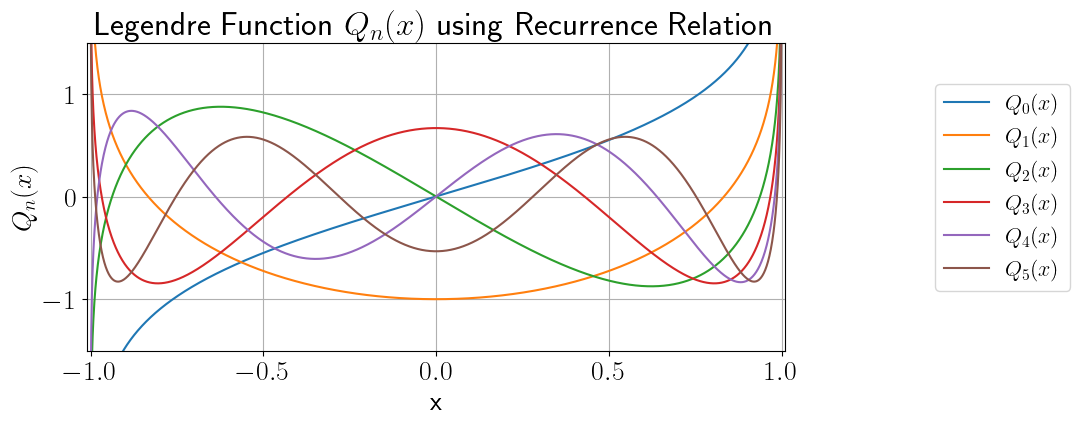

In [15]:
x = np.arange(-1, 1., 0.001)     

for n in range(0, 5+1):
    plt.plot(x, Q(n, x), label=f'$Q_{n}(x)$')
plt.xlabel('x')
plt.ylabel(r'$Q_n(x)$')
plt.ylim(-1.5,1.5)
plt.xlim(x.min()-0.01,x.max()+0.01)
plt.title('Legendre Function $Q_n(x)$ using Recurrence Relation')
plt.legend(bbox_to_anchor=(1.2, 0.9))
plt.grid(True)
plt.show()

$(n+1)Q_{n+1}(x)= (2n+1)xQ_n(x)-nQ_{n-1}(x)$

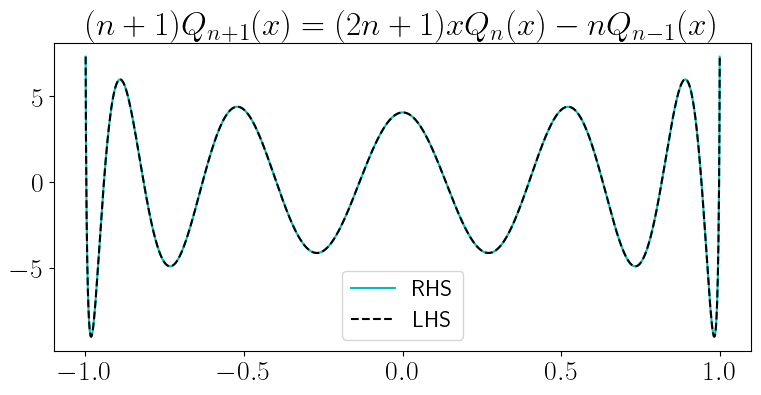

In [16]:
n = 10
RHS = (n + 1) * Q(n + 1, x)
LHS = (2 * n + 1) * x * Q(n, x) - n * Q(n - 1, x)
plt.plot(x, RHS,  'c-',label='RHS')
plt.plot(x, LHS, 'k--',label='LHS')
plt.title(r'$(n+1)Q_{n+1}(x)= (2n+1)xQ_n(x)-nQ_{n-1}(x)$')
plt.legend()
plt.show()

$(1 − x^2)Q'_n(x) = n(Q_{n−1}(x) − xQ_n(x))$

In [17]:
def dQ(n,x):
    return n * (Q(n - 1, x) - x * Q(n, x)) / (1 - x**2)

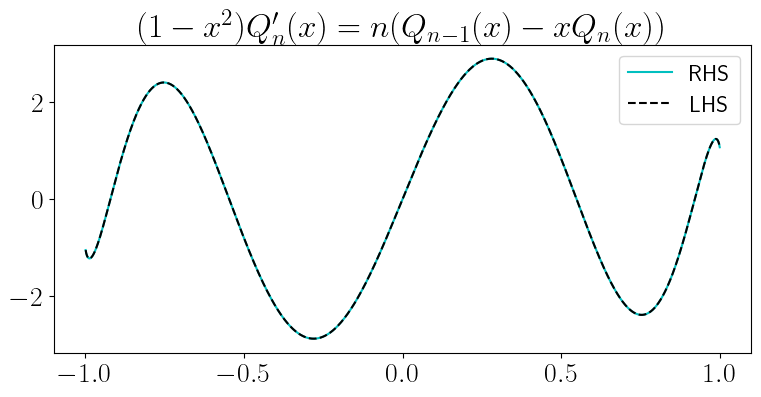

In [18]:
n = 5
LHS = (1 - x**2) * dQ(n, x)
RHS = n * (Q(n - 1, x) - x * Q(n, x))
plt.plot(x, RHS,  'c-',label='RHS')
plt.plot(x, LHS, 'k--',label='LHS')
plt.title(r"$(1 − x^2)Q'_n(x) = n(Q_{n−1}(x) − xQ_n(x))$")
plt.legend()
plt.show()

$Q'_{n+1}(x) = (n + 1)Q_n(x) + xQ'_n(x)$

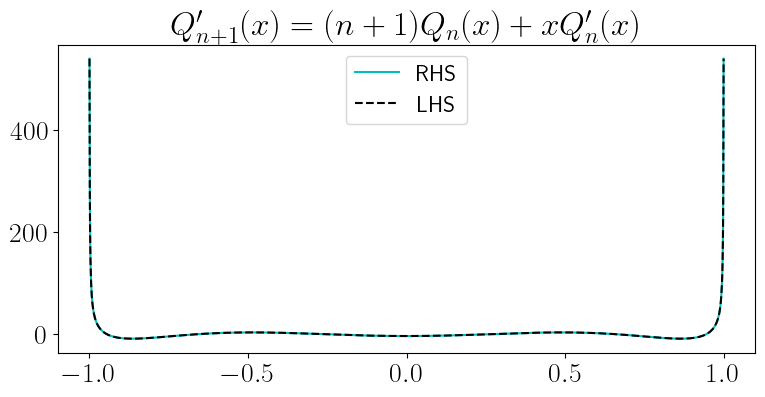

In [19]:
n = 5
LHS = dQ(n + 1, x)
RHS = (n + 1) * Q(n, x) + x * dQ(n, x)
plt.plot(x, RHS,  'c-',label='RHS')
plt.plot(x, LHS, 'k--',label='LHS')
plt.title(r"$Q'_{n+1}(x) = (n + 1)Q_n(x) + xQ'_n(x)$")
plt.legend()
plt.show()

$Q'_{n-1}(x) = -nQ_n(x) + xQ'_n(x)$

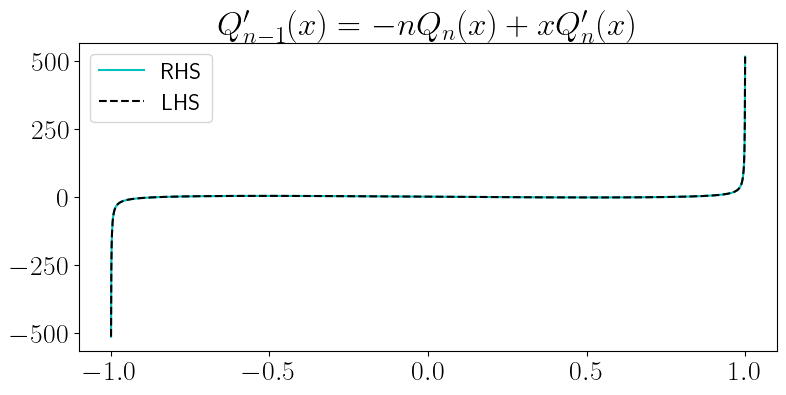

In [20]:
n = 4
LHS = dQ(n - 1, x)
RHS = -n * Q(n, x) + x * dQ(n, x)
plt.plot(x, RHS,  'c-',label='RHS')
plt.plot(x, LHS, 'k--',label='LHS')
plt.title(r"$Q'_{n-1}(x) = -nQ_n(x) + xQ'_n(x)$")
plt.legend()
plt.show()

$(2n + 1)Q_n(x) = Q'_{n+1}(x)− Q'_{n−1}(x)$

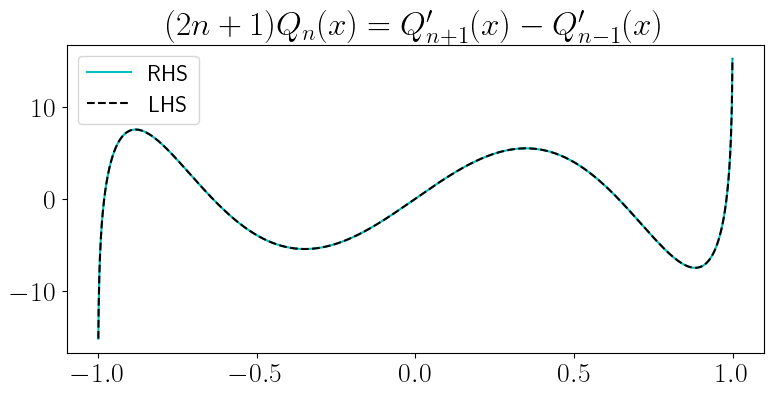

In [21]:
n = 4
LHS = (2 * n + 1) * Q(n, x)
RHS = dQ(n + 1, x) - dQ(n - 1, x)
plt.plot(x, RHS,  'c-',label='RHS')
plt.plot(x, LHS, 'k--',label='LHS')
plt.title(r"$(2n + 1)Q_n(x) = Q'_{n+1}(x)− Q'_{n−1}(x)$")
plt.legend()
plt.show()

$Q'_{n+1}(x) + Q'_{n−1}(x) = Q_n(x) + 2xQ'_n(x)$

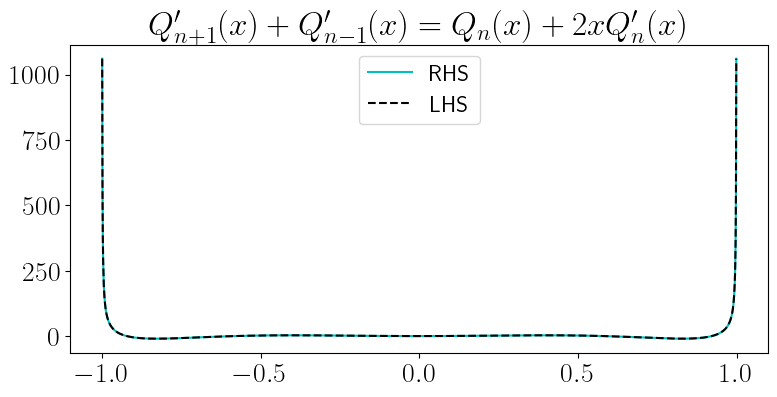

In [22]:
n = 5
LHS = dQ(n + 1, x) + dQ(n - 1, x)
RHS = Q(n, x) + 2 * x * dQ(n, x)
plt.plot(x, RHS,  'c-',label='RHS')
plt.plot(x, LHS, 'k--',label='LHS')
plt.title(r"$Q'_{n+1}(x) + Q'_{n−1}(x) = Q_n(x) + 2xQ'_n(x)$")
plt.legend()
plt.show()

$\displaystyle\int_{-1}^1 P_n (x) P_m (x) dx = \frac{2}{2n+1} \delta_{mn} \text{ where } \begin{equation*}\delta_{mn} = \left\{\begin{array}{rl} 0 & \text{if } m\neq n,\\ 1 & \text{if } m=n.\end{array}\right.\end{equation*} \text{ where n=0,1,2,...}$

In [23]:
def L_Delta(P,m,n,N=1000):
    
    f = lambda x: (P(n,x)) * (P(m,x))
    a,b = -1, 1
    
    def delta(m,n):
        if m==n:
            return 1
        else :
            return 0
        
    x = np.linspace(a, b, N + 1)
    LHS = np.round([(b - a) / (2 * N) * (f(a) + 2 * np.sum(f(x[1:N])) + f(b))],4)
    RHS = np.round([2 / (2 * n + 1) * delta(m,n)], 4)
    print('LHS :', LHS,'RHS :', RHS)
    print('Is LHS == RHS ?', np.array_equal(LHS, RHS))

In [24]:
L_Delta(P,m=1,n=1,N=1000)          # if m = n

LHS : [0.6667] RHS : [0.6667]
Is LHS == RHS ? True


In [25]:
L_Delta(P,m=2,n=5,N=1000)          # if 𝑚 ≠ 𝑛 

LHS : [0.] RHS : [0.]
Is LHS == RHS ? True


The electric potential $\Phi(r,\theta)$ (in spherical coordinates) due to a point charge located on the $z$-axis at $z = a$ (see diagram right) varies as

<img width="200" height="200" align="right" src="https://upload.wikimedia.org/wikipedia/commons/c/c5/Point_axial_multipole.svg">

$\qquad\qquad\displaystyle \Phi (r,\theta )\propto {\frac {1}{R}}={\frac {1}{\sqrt {r^{2}+a^{2}-2ar\cos \theta }}}$

If the radius $r$ of the observation point $P$ is greater than $a$, the potential may be expanded in the Legendre polynomials

$\qquad\qquad\displaystyle \Phi (r,\theta )\propto {\frac {1}{r}}\sum _{k=0}^{\infty }\left({\frac {a}{r}}\right)^{k}P_{k}(\cos \theta )$

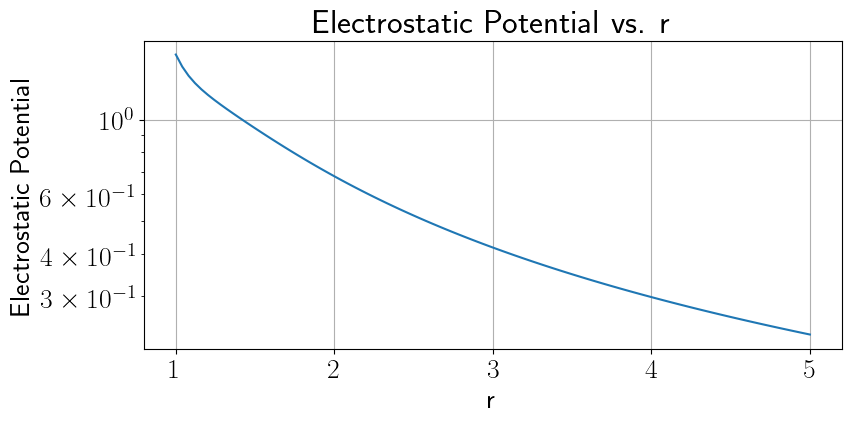

In [26]:
def electrostatic_potential(r, theta, a):
    max_term = 10  
    potential = 0.0
    x = np.cos(theta)
    
    for k in range(max_term):
        potential += P(k, x) * (a / r) ** k    
    potential *= 1/r  
    return potential

r_values = np.linspace(1, 5, 100)  
theta = np.pi / 4  
a = 1.0  
phi_values = [electrostatic_potential(r, theta, a) for r in r_values]

plt.semilogy(r_values, phi_values)
plt.xlabel('r')
plt.ylabel('Electrostatic Potential')
plt.title('Electrostatic Potential vs. r')
plt.grid(True)
plt.show()

A charge $+q$ is situated at the origin and charges of $-q$ are situated at distances $\pm a$ from it along the polar axis.  
From the generating function of Legendre polynomial , show that the electrostatic potential $\Phi$ at a point $(r,\theta,\phi)$ with $r>a$ is given by                                                                                    
$ \qquad \displaystyle \Phi(r,\theta,\phi)=\frac{2q}{4\pi\epsilon_0 r} \sum_{s=1}^\infty \left(\frac{a}{r}\right)^{2s} P_{2s} \left(\cos\theta\right)$

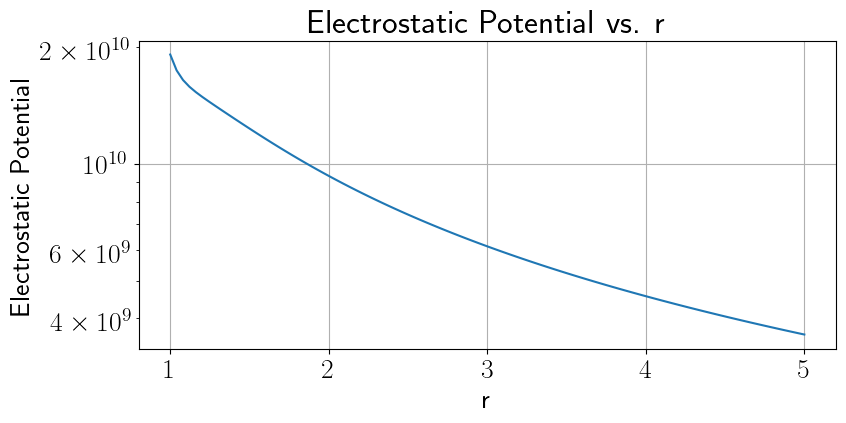

In [27]:
def electrostatic_potential(r, theta, a, q):
    max_term = 10  
    potential = 0.0
    x = np.cos(theta)
    
    for s in range(max_term):
        potential += P(2 * s, x) * (a / r) ** (2 * s)    
    potential *= 2 * q / (4 * np.pi * 8.85e-12 * r)  # 8.85e-12 is the permittivity of free space
    return potential

r_values = np.linspace(1, 5, 100)  
theta = np.pi / 4  
a = 1.0  
q = 1.0  
phi_values = [electrostatic_potential(r, theta, a, q) for r in r_values]

plt.semilogy(r_values, phi_values)
plt.xlabel('r')
plt.ylabel('Electrostatic Potential')
plt.title('Electrostatic Potential vs. r')
plt.grid(True)
plt.show()

Legendre rational functions

$\qquad\qquad R_n(x)=\frac{\sqrt{2}}{x+1} P_n \left(\frac{x-1}{x+1}\right)$

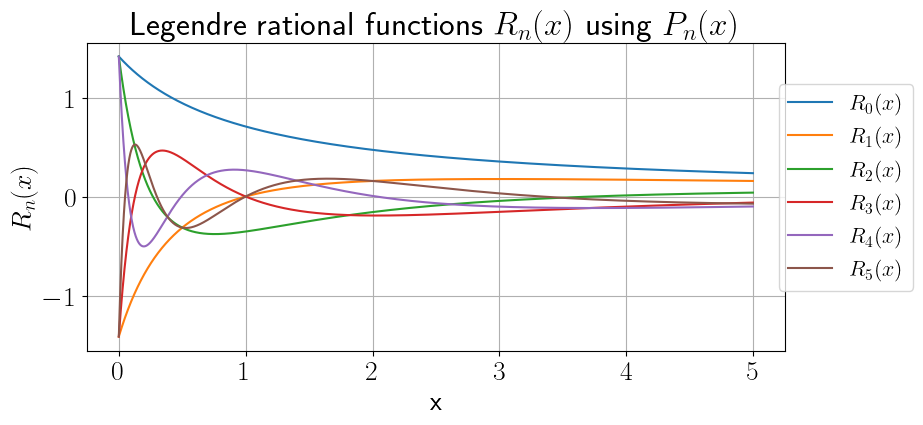

In [28]:
def R(n,x):
    return (2**0.5 / (x+1))*P(n, ((x-1)/(x+1)))

x = np.arange(0, 5., 0.001) # Range of x values

for n in range(0, 5+1):
    plt.plot(x, R(n, x), label=f'$R_{n}(x)$')
plt.xlabel('x')
plt.ylabel(r'$R_n(x)$')
plt.title('Legendre rational functions $R_n(x)$ using $P_n(x)$')
plt.legend(bbox_to_anchor=(1.2, 0.9))
plt.grid(True)
plt.show()

Legendre polynomials in trigonometry is $P_n(\cos\theta)$

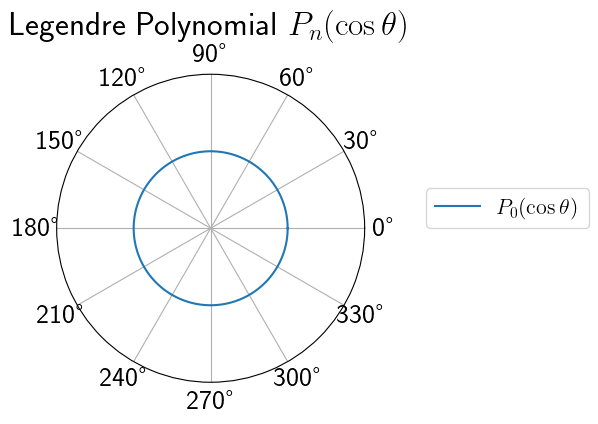

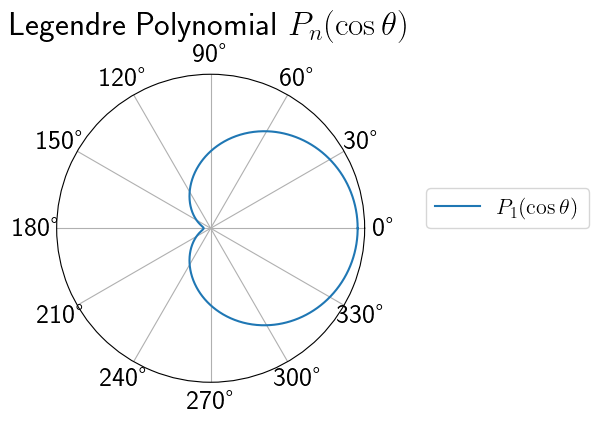

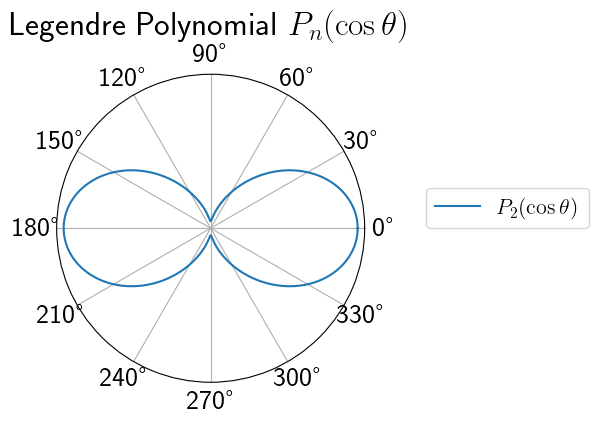

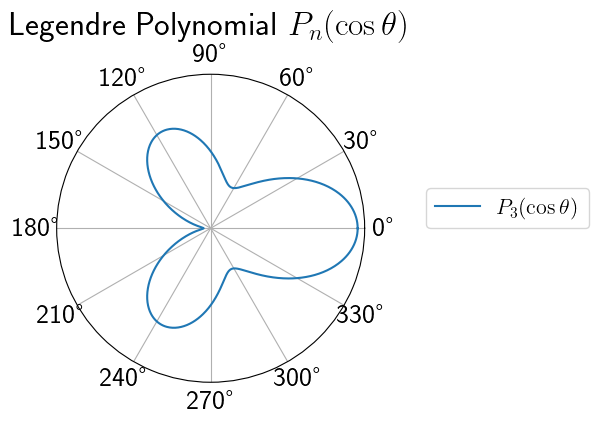

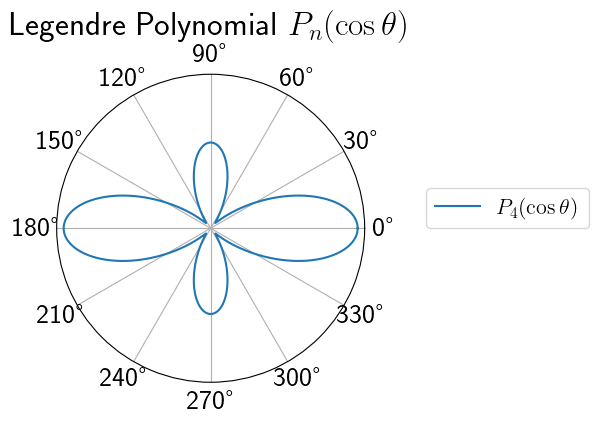

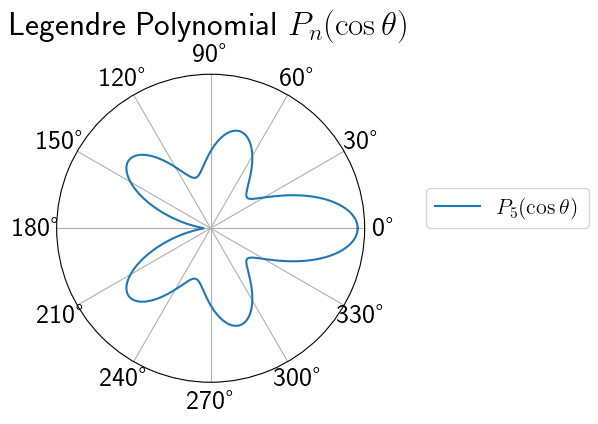

In [29]:
theta = np.linspace(0, 2 * np.pi, 1000)

#fig = plt.figure()
#ax = fig.add_subplot(111, polar=True)
for n in [0,1,2,3,4,5]:
    fig = plt.figure()
    ax = fig.add_subplot(111, polar=True)
    legendre_values = [P(n, np.cos(angle)) for angle in theta]
    ax.plot(theta, legendre_values, label=f'$P_{n}$'+r'$(\cos\theta)$')
    ax.set_rticks([])      # No radial ticks
    ax.set_thetagrids(np.arange(0, 360, 30))  
    plt.title(r'Legendre Polynomial $P_{n}(\cos\theta)$')
    plt.legend(loc=(1.2,0.5))
    plt.show()

$\text{ Chebyshev  differential equation}$ has the form

$\qquad\qquad \displaystyle(1-x^2)\ddot{y}-x\dot{y}+n^2y=0  $

$ \displaystyle T_n(x)=\cos(n \cos^{-1} x) \qquad \text{ where }x=\cos\theta$

$ \displaystyle T_0(x)=1$

$ \displaystyle T_1(x)=x$

$ \displaystyle T_2(x)=2x^2-1$

$ \displaystyle T_3(x)=4x^3-3x$

The generating function equation for the Chebyshev polynomials $T_n(x)$ is defined by the equation

$\displaystyle \frac{1-hx}{1-2hx+h^2} = \sum^∞_{n=0}T_n(x)h^n$

Recall the trigonometric addition formulas,

$ \displaystyle \cos(\alpha \pm \beta) = \cos(\alpha) \cos(\beta) \mp \sin(\alpha) \sin(\beta)$

Let $n ≥ 1$ , and apply these identities to get

$ \displaystyle T_{n+1}(x) = \cos[(n + 1)\theta] = \cos(n\theta + \theta) = \cos(n\theta)\cos(\theta) − \sin(n\theta)\sin(\theta)$

$ \displaystyle T_{n−1}(x) = \cos[(n − 1)\theta] = \cos(n\theta − \theta)= \cos(n\theta)\cos(\theta) + \sin(n\theta)\sin(\theta)$

Add these two equations, and then use $(1)$ and $(3)$ to obtain

$ \displaystyle T_{n+1}(x) + T_{n−1}(x) = 2 \cos(n\theta)\cos(\theta) = 2xT_n(x)$

$  \displaystyle T_{n+1}(x) = 2xT_n(x) − T_{n−1}(x), n ≥ 1$

This is called the triple recursion relation for the Chebyshev polynomials.

Let $n\rightarrow (n-1)$

then , $ \displaystyle T_{(n-1)+1}(x)=2xT_{(n-1)}(x)-T_{(n-1)-1}(x)$

or , $ \displaystyle \boxed{T_{n}(x)=2xT_{n-1}(x)-T_{n-2}(x)}$

This is Chebyshev Polynomials of $1^{st}$ order

$\displaystyle T_{n}(x)=\begin{cases}{1}&n=0\\x&n=1\\2xT_{n-1}(x)-T_{n-2}(x)&n\geq 2\,.\end{cases}$

In [30]:
def T(n,x):
    if n==0:
        return 1 + 0.*x
    elif n==1:
        return x
    else:
        return 2 * x * T(n - 1, x) - T(n - 2, x)

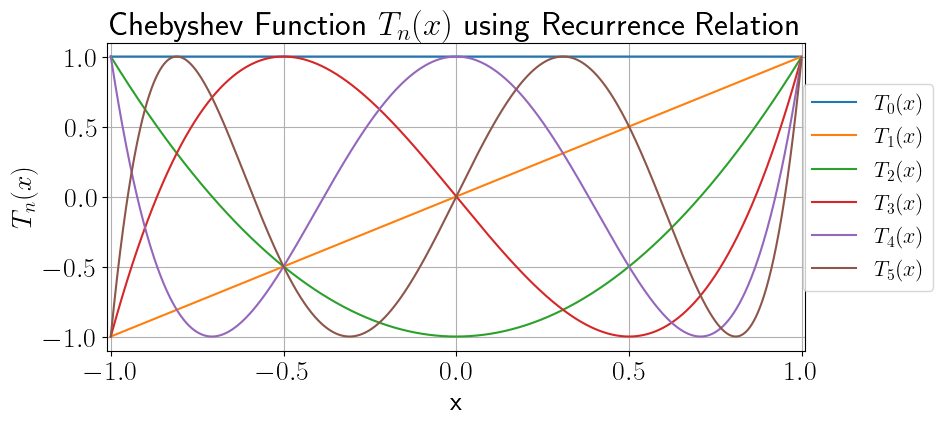

In [31]:
x = np.arange(-1., 1., 0.001) # Range of x values

for n in range(0, 5+1):
    plt.plot(x, T(n, x), label=f'$T_{n}(x)$')
plt.xlabel('x')
plt.ylim(-1.1,1.1)
plt.xlim(x.min()-0.01,x.max()+0.01)
plt.ylabel(r'$T_n(x)$')
plt.title('Chebyshev Function $T_n(x)$ using Recurrence Relation')
plt.legend(bbox_to_anchor=(1.2, 0.9))
plt.grid(True)
plt.show()

$T_n(x)=\cos(n \cos^{-1}x)$

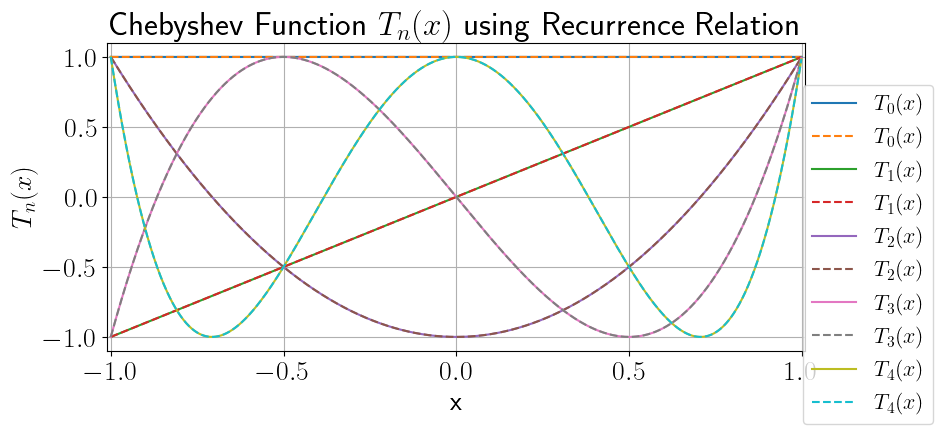

In [32]:
x = np.arange(-1., 1., 0.001) # Range of x values

for n in range(5):
    plt.plot(x, np.cos(n*np.arccos(x)), label=f'$T_{n}(x)$')
    plt.plot(x, T(n, x),'--', label=f'$T_{n}(x)$')
plt.xlabel('x')
plt.ylim(-1.1,1.1)
plt.xlim(x.min()-0.01,x.max()+0.01)
plt.ylabel(r'$T_n(x)$')
plt.title('Chebyshev Function $T_n(x)$ using Recurrence Relation')
plt.legend(bbox_to_anchor=(1.2, 0.9))
plt.grid(True)
plt.show()

$ \displaystyle U_n(x)=\frac{\sin[(n+1) \cos^{-1} x]}{\sin(\cos^{-1} x)}  \qquad \text{ where }x=\cos\theta$

$ \displaystyle U_0(x)=1$

$ \displaystyle U_1(x)=2x$

$ \displaystyle U_2(x)=4x^2-1$

$ \displaystyle U_3(x)=8x^3-4x$

The generating function equation for the Chebyshev polynomials $T_n(x)$ is defined by the equation

$\displaystyle \frac{1}{1-2hx+h^2} = \sum^∞_{n=0}U_n(x)h^n$

Let $n ≥ 1$ , and apply these identities to get

$ \displaystyle U_{n−1}(x) = \frac{\sin[\{(n − 1)+1\}\theta]}{\sin\theta} = \frac{\sin(n\theta)}{\sin\theta}$

Assuming, $ \displaystyle U_n(x) \sin(\theta)=\sin[(n+1) \theta]  $

Let $n\rightarrow (n+1)$

or, $ \displaystyle U_{n+1}(x) \sin(\theta)=\sin[\{(n+1)+1\} \theta]$

or, $ \displaystyle U_{n+1}(x) \sin(\theta)=\sin[(n+1)\theta+\theta]  $

or, $ \displaystyle U_{n+1}(x) \sin(\theta)=\sin[(n+1)\theta]\cos(\theta)+\cos[(n+1)\theta]\sin(\theta)$

or, $ \displaystyle U_{n+1}(x) \sin(\theta)=2\sin[(n+1)\theta]\cos(\theta)+\cos[(n+1)\theta]\sin(\theta)−\sin[(n+1)\theta]\cos(\theta)$

or, $ \displaystyle U_{n+1}(x) \sin(\theta)=2\sin[(n+1)\theta]\cos(\theta)−[\sin\{(n+1)\theta\}\cos(\theta)−\cos\{(n+1)\theta\}\sin(\theta)]$

or, $ \displaystyle U_{n+1}(x) \sin(\theta)=2\sin[(n+1)\theta]\cos(\theta)−\sin[(n+1)\theta−\theta]$

or, $ \displaystyle U_{n+1}(x) \sin(\theta)=2\cos(\theta)\sin[(n+1)\theta]−\sin[(n−1+1)\theta]$

or, $ \displaystyle U_{n+1}(x) \sin(\theta)=2\cos(\theta)\sin[(n+1)\theta]−\sin(n\theta)$

or, $ \displaystyle U_{n+1}(x) =2\cos(\theta)\frac{\sin[(n+1)\theta]}{\sin(\theta)}−\frac{\sin(n\theta)}{\sin(\theta)}$

or, $ \displaystyle U_{n+1}(x) =2xU_n(x)−U_{n−1}(x)$

Let $n\rightarrow (n-1)$

then , $ \displaystyle U_{(n-1)+1}(x)=2xU_{(n-1)}(x)-U_{(n-1)-1}(x)$

or , $ \displaystyle \boxed{U_{n}(x)=2xU_{n-1}(x)-U_{n-2}(x)}$

This is Chebyshev Polynomials of $2^{nd}$ order

$\displaystyle U_{n}(x)=\begin{cases}{1}&n=0\\2x&n=1\\2xU_{n-1}(x)-U_{n-2}(x)&n\geq 2\,.\end{cases}$

In [33]:
def U(n, x):
    if n==0:
        return 1 + 0.*x
    elif n==1:
        return 2 * x
    else:
        return 2 * x * U(n - 1, x) - U(n - 2, x)

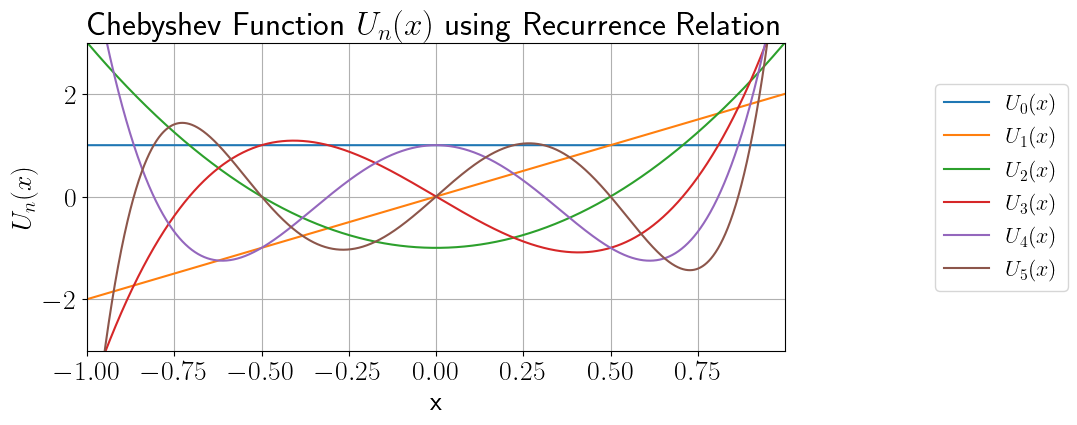

In [34]:
x = np.arange(-1., 1., 0.001) # Range of x values

for n in range(0, 5+1):
    plt.plot(x, U(n, x), label=f'$U_{n}(x)$')
plt.xlabel('x')
plt.ylim(-3.0,3.0)
plt.xlim(x.min(),x.max())
plt.ylabel(r'$U_n(x)$')
plt.title('Chebyshev Function $U_n(x)$ using Recurrence Relation')
plt.legend(bbox_to_anchor=(1.2, 0.9))
plt.grid(True)
plt.show()

$ \displaystyle T_n(x)=U_n(x)-xU_{n-1}(x)$

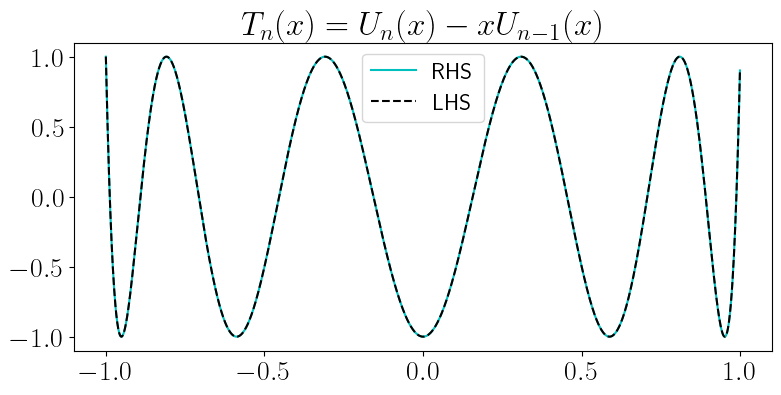

In [35]:
n = 10
LHS = T(n, x)
RHS = U(n, x) - x * U(n - 1, x)
plt.plot(x, RHS,  'c-',label='RHS')
plt.plot(x, LHS, 'k--',label='LHS')
plt.title(r"$T_n(x)=U_n(x)-xU_{n-1}(x)$")
plt.legend()
plt.show()

$ \displaystyle(1-x^2)U_n(x)=xT_{n+1}(x)-T_{n+2}(x)$

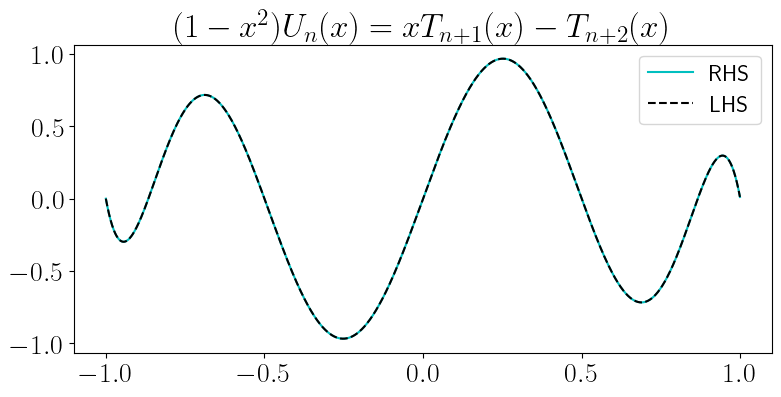

In [36]:
n = 5
LHS = (1 - x**2) * U(n, x)
RHS = x * T(n + 1, x) - T(n + 2, x)
plt.plot(x, RHS,  'c-',label='RHS')
plt.plot(x, LHS, 'k--',label='LHS')
plt.title(r"$(1-x^2)U_n(x)=xT_{n+1}(x)-T_{n+2}(x)$")
plt.legend()
plt.show()

$\text{Hermite  differential equation}$ has the form

$\qquad\qquad \displaystyle\ddot{y} - 2x\dot{y} + 2ny = 0 $

$ \displaystyle H_n(x)= (-1)^n e^{x^2} \frac{d^n}{dx^n}(x^n e^{-x^2})$

$ \displaystyle H_0(x)=1 $

$ \displaystyle H_1(x)=2x$

$ \displaystyle H_2(x)=4x^2-2$

$ \displaystyle H_3(x)=8x^3-12x$

The generating function equation for the Hermite polynomials $H_n(x)$ reads

$\displaystyle e^{2hx−h^2}=\sum^∞_{n=0}\frac{H_n(x)h^n}{n!}$

we differentiate above eqn. with respect to $h$ to yield

or , $\displaystyle (2x-2h)e^{2hx−h^2}=\sum_n\frac{H_n(x).n.h^{n-1}}{n!}$

or , $\displaystyle (2x-2h)\sum_n\frac{H_n(x)h^n}{n!}=\sum_n\frac{H_n(x).n.h^{n-1}}{n.(n-1)!}$

or , $\displaystyle 2x\sum_n\frac{H_n(x)h^n}{n!}-2h\sum_n\frac{H_n(x)h^n}{n!}=\sum_n\frac{H_n(x)h^{n-1}}{(n-1)!}$

or , $\displaystyle \sum_n 2x \frac{H_n(x)h^n}{n!}-\sum_n 2h \frac{H_n(x)h^n}{n!}=\sum_n\frac{H_n(x)h^{n-1}}{(n-1)!}$

or , $\displaystyle \sum_n 2x \frac{H_n(x)h^n}{n!}-\sum_n 2 \frac{H_n(x)h^{n+1}}{n!}=\sum_n\frac{H_n(x)h^{n-1}}{(n-1)!}$

or , $\displaystyle \sum_n 2x \frac{H_n(x)h^n}{n!}-\sum_n 2 \frac{H_{n-1}(x)h^{(n-1)+1}}{(n-1)!}=\sum_n\frac{H_{n+1}(x)h^{(n+1)-1}}{(n+1-1)!}$

or , $\displaystyle \sum_n 2x \frac{H_n(x)h^n}{n!}-\sum_n 2 \frac{H_{n-1}(x)h^{n}}{(n-1)!}=\sum_n\frac{H_{n+1}(x)h^{n}}{n!}$

or , $\displaystyle \sum_n\frac{ 2x H_n(x)h^n}{n!}-\sum_n \frac{2n H_{n-1}(x)h^{n}}{n.(n-1)!}=\sum_n\frac{H_{n+1}(x)h^{n}}{n!}$

or , $\displaystyle \sum_n\frac{ 2x H_n(x)h^n}{n!}-\sum_n \frac{2n H_{n-1}(x)h^{n}}{n!}=\sum_n\frac{H_{n+1}(x)h^{n}}{n!}$

Equating coefficients of $h^n$ we obtain
  
or , $ \displaystyle H_{n+1}(x)=2xH_n(x)-2nH_{n-1}(x)$

Let $n\rightarrow (n-1)$

then , $ \displaystyle H_{(n-1)+1}(x)=2xH_{(n-1)}(x)-2(n-1)H_{(n-1)-1}(x)$

or , $ \displaystyle\boxed{H_{n}(x)=2xH_{n-1}(x)-2(n-1)H_{n-2}(x)}$

$\displaystyle H_{n}(x)=\begin{cases}{1}&n=0\\2x&n=1\\2xH_{n-1}(x)-2(n-1)H_{n-2}(x)&n\geq 2\,.\end{cases}$

In [37]:
def H(n, x): 
    if(n == 0):
        return 1.0 + 0.* x                                             # H_0(x) = 1
    elif(n == 1):
        return 2.* x                                                   # H_1(x) = x
    else:
        return (2.* x * H(n - 1 , x ) - 2 * ( n - 1 ) * H(n - 2 , x))  # H_n(x)

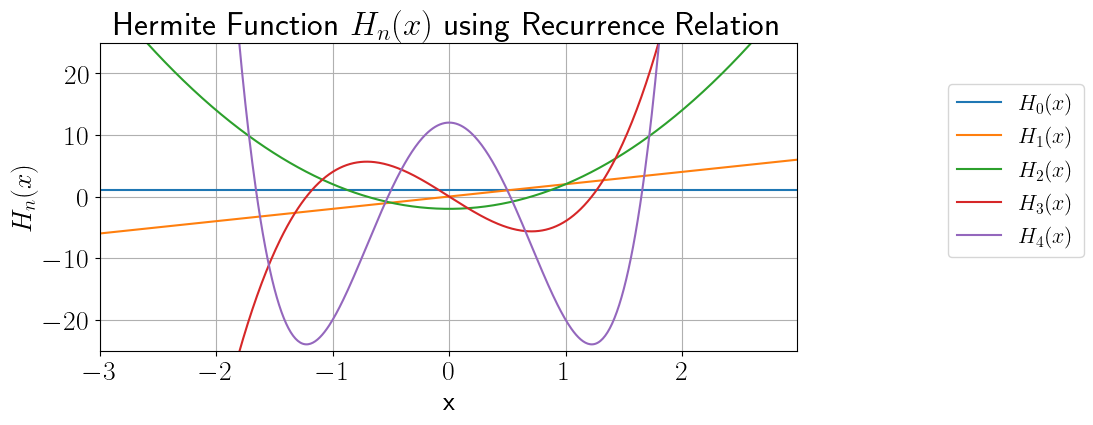

In [38]:
x=np.arange( -3, 3, 0.01)  # Range of x values

for n in range(0, 5):
    plt.plot(x, H(n, x), label=f'$H_{n}(x)$')
plt.ylim([-25, 25])
plt.xlim(x.min(),x.max())
plt.xlabel('x')
plt.ylabel(r'$H_n(x)$')
plt.title('Hermite Function $H_n(x)$ using Recurrence Relation')
plt.legend(bbox_to_anchor=(1.2, 0.9))
plt.grid(True)
plt.show()

$ \displaystyle H_{n+1}(x)=2xH_n(x)-2nH_{n-1}(x)$

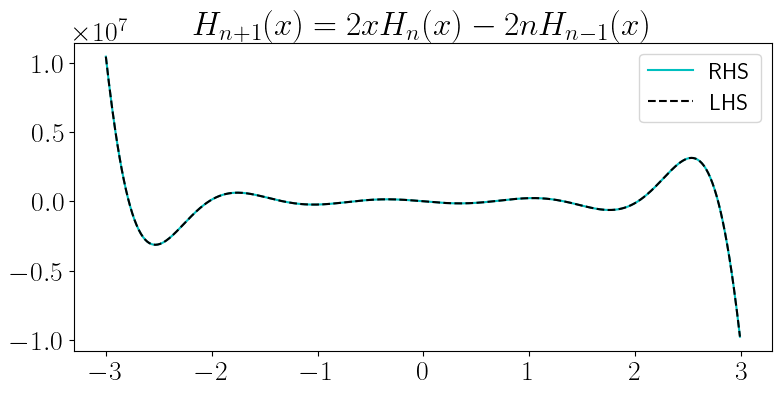

In [39]:
n = 10
LHS = H(n + 1, x)
RHS = 2 * x * H(n, x) - 2 * n * H(n - 1, x)
plt.plot(x, RHS,  'c-',label='RHS')
plt.plot(x, LHS, 'k--',label='LHS')
plt.title(r"$H_{n+1}(x)=2xH_n(x)-2nH_{n-1}(x)$")
plt.legend()
plt.show()

$H'_n(x) = 2nH_{n−1}(x)$

In [40]:
def dH1(n,x):
    return 2 * n * H(n - 1, x)

$H_n'(x)=2xH_n(x)-H_{n+1}(x)$

In [41]:
def dH2(n,x):
    return 2 * x * H(n, x) - H(n+1, x)

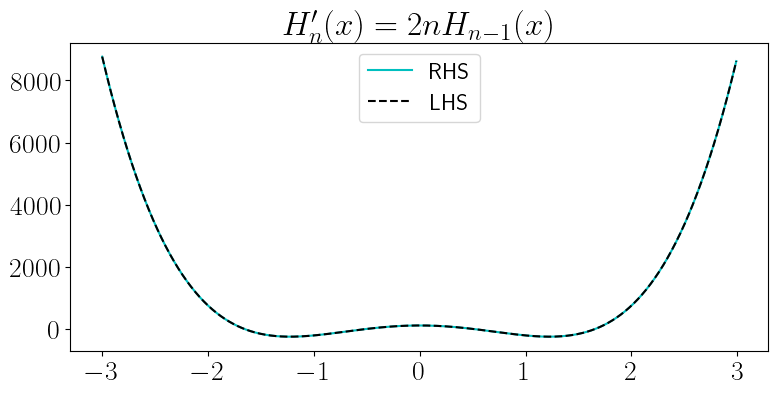

In [42]:
n = 5
LHS = dH1(n, x)
RHS = dH2(n, x)
plt.plot(x, RHS,  'c-',label='RHS')
plt.plot(x, LHS, 'k--',label='LHS')
plt.title(r"$H'_n(x) = 2nH_{n−1}(x)$")
plt.legend()
plt.show()

$P_n(x)=\frac{2}{\sqrt{\pi}n!}\int_0^\infty t^n e^{-t^2} H_n(xt) \ dt$

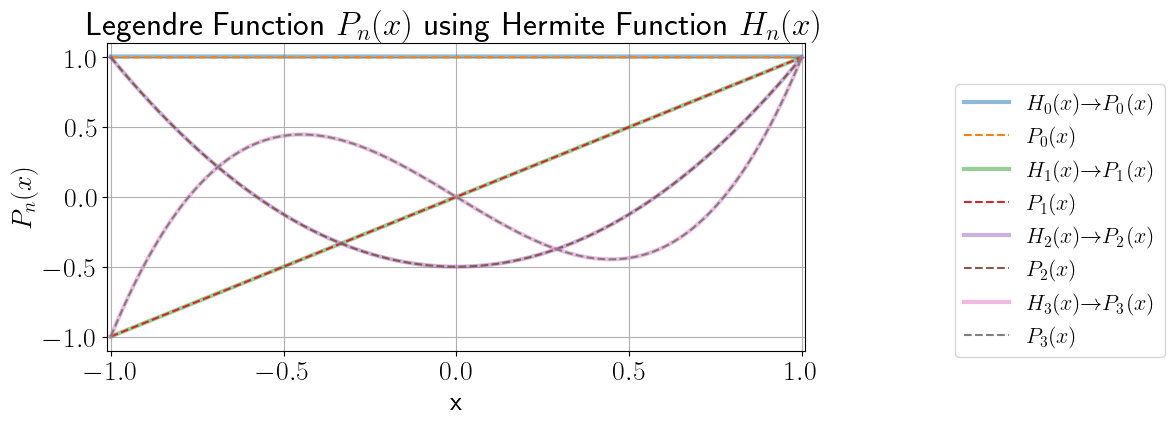

In [43]:
def H_P(n, x):
    t = np.linspace(0, 10, 1000)  # Adjust the range of t as needed
    dt = t[1] - t[0]
    I = np.sum(t**n*np.exp(-t**2)*H(n,x*t)*dt)
    return 2.0 / (np.sqrt(np.pi) * np.math.factorial(n)) * I

x = np.arange(-1, 1, 0.001)

for n in range(4):
    y = [H_P(n, xi) for xi in x]
    plt.plot(x, y, linewidth=3, alpha=0.5,label=f'$H_{n}(x)$'+r'$\rightarrow$'+f'$P_{n}(x)$')
    plt.plot(x, P(n, x),'--', label=f'$P_{n}(x)$')
plt.xlabel('x')
plt.xlim(x.min()-0.01,x.max()+0.01)
plt.ylabel(r'$P_n(x)$')
plt.title('Legendre Function $P_n(x)$ using Hermite Function $H_n(x)$')
plt.legend(bbox_to_anchor=(1.2, 0.9))
plt.grid(True)
plt.show()

**1. Simple Harmonic Oscillator :**

We begin with the one-dimensional Schrödinger equation for a non-relativistic quantum harmonic oscillator:

$\qquad\qquad \hat{H}\psi(x) = E\psi(x) $

Where:
- $\hat{H}$ is the Hamiltonian operator for the harmonic oscillator.
- $\psi(x)$ is the wave function that we want to determine.
- $E$ is the energy eigenvalue that corresponds to the quantum state.

**2. Hamiltonian Operator:**

The Hamiltonian operator for the harmonic oscillator is given by:

$\qquad\qquad \displaystyle \hat{H} = -\frac{\hbar^2}{2m}\frac{d^2}{dx^2} + \frac{1}{2}kx^2 $

Where:
- $\hbar$ is the reduced Planck constant.
- $m$ is the mass of the particle.
- $k$ is the spring constant.
- $x$ is the position of the particle.

**3. Separation of Variables:**

We can make an ansatz that the wave function can be separated into spatial and energy parts:

$\qquad\qquad \displaystyle \psi(x) = \phi(x) \cdot f(E) $

Where:
- $\phi(x)$ is the spatial part, which depends on position $x$.
- $f(E)$ is the energy part, which depends on the energy eigenvalue $E$.

**4. Energy Part:**

The energy part, $f(E)$, is determined by the solutions of the time-independent Schrödinger equation for the harmonic oscillator.                                                                                                               
These solutions are quantized and given by:

$\qquad\qquad \displaystyle E_n = \left(n + \frac{1}{2}\right)\hbar\omega $

Where:
- $n$ is a non-negative integer.
- $\omega$ is the angular frequency of the oscillator.

**5. Spatial Part:**

The spatial part, $\phi(x)$, is determined by the Hermite polynomials, $H_n(x)$,                                              
and is normalized to form a complete set of orthonormal functions for the quantum harmonic oscillator.                      
The normalized spatial part is given by:

$\qquad\qquad \displaystyle \phi_n(x) = \left(\frac{m\omega}{\pi\hbar}\right)^{1/4} \frac{1}{\sqrt{2^n n!}} H_n(x) e^{-\frac{m\omega x^2}{2\hbar}} $

**6. Combined Wave Function:**

The combined wave function $\psi_n(x)$ for the $n$-th energy level is obtained by multiplying the spatial and energy parts:

$\qquad\qquad \displaystyle \psi_n(x) = \phi_n(x) \cdot f(E_n)$

Substituting the expressions for $\phi_n(x)$ and $f(E_n)$, you get the final expression for $\psi_n(x)$:

$\qquad\qquad \displaystyle\boxed{ \psi_n(x) = H(n, x) \frac{e^{-\frac{x^2}{2}}}{\sqrt{2^n n! \sqrt{\pi}}}} $

This is the wave function for the quantum harmonic oscillator for the $n$-th energy level.                                
It describes the probability amplitude of finding the particle at position $x$ for that energy level.
   

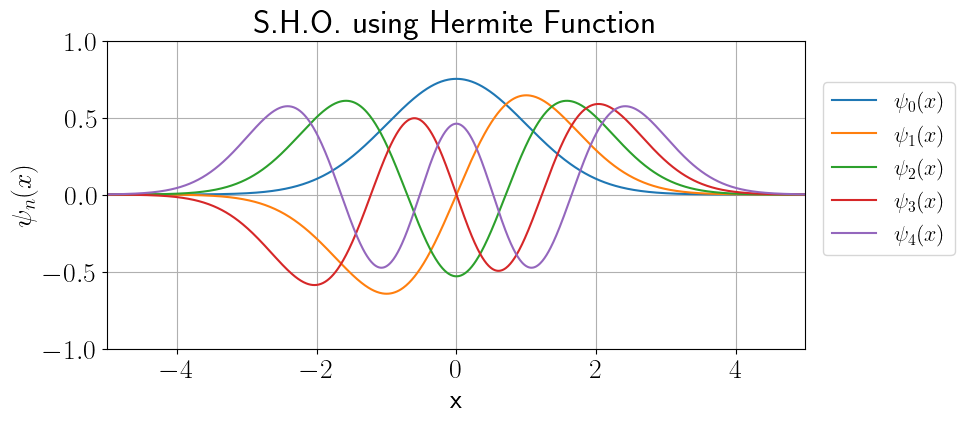

In [44]:
def psi(n, x):
    return H(n, x) * np.exp(-x**2/2)/(2**n * np.math.factorial(n) * np.pi**0.5)**0.5

x=np.arange( -5, 5, 0.01)  # Range of x values

for n in range(0, 5):
    plt.plot(x, psi(n, x), label=f'$\psi_{n}(x)$')
plt.ylim([-1, 1])
plt.xlim(x.min(),x.max())
plt.xlabel('x')
plt.ylabel(r'$\psi_n(x)$')
plt.title('S.H.O. using Hermite Function')
plt.legend(bbox_to_anchor=(1.01, 0.9))
plt.grid(True)
plt.show()

$\text{Laguerre  differential equation}$ has the form

$\qquad\qquad\displaystyle x\ddot{y} + (1 - x)\dot{y} + n y = 0 $

$ \displaystyle L_n(x)=e^x \frac{d^n}{dx^n}(x^n e^{-x})$

$ \displaystyle L_0(x)=1 $

$ \displaystyle L_1(x)=1-x$

$ \displaystyle L_2(x)=\frac{x^2-4x+2}{2!}$

$ \displaystyle L_3(x)=\frac{-x^3+9x^2-18x+6}{3!}$

$ \displaystyle L_4(x)=\frac{x^4 − 16x^3 + 72x^2 − 96x + 24}{4!}$

$ \displaystyle L_5(x)=\frac{−x^5 + 25x^4 − 200x^3 + 600x^2 − 600x + 120}{5!}$

The generating function for the Laguerre polynomials $L_n(x)$ is given by

$\displaystyle \frac{\exp\bigg({−\frac{xh}{(1−h)}}\bigg)}{(1 − h)}=\sum^∞_{n=0}L_n(x)h^n$

Differentiating the generating function above with respect to $h$, we find

or , $\displaystyle \frac{\bigg(−\frac{hx}{(1-h)^2}−\frac{x}{1-h}\bigg)\exp\big(−\frac{hx}{1-h}\big)}{1-h}+\frac{\exp\big(-\frac{hx}{1-h}\big)}{(1-h)^2}= \sum_n nL_n(x)h^{n−1}$

or , $\displaystyle \bigg\{{\bigg(−\frac{hx}{(1-h)^2}−\frac{x}{1-h}\bigg)}+\frac{1}{1-h}\bigg\}\frac{\exp\big(-\frac{hx}{1-h}\big)}{(1-h)}= \sum_n nL_n(x)h^{n−1}$

or , $\displaystyle {\bigg(−\frac{hx}{(1-h)^2}−\frac{x}{1-h}}+\frac{1}{1-h}\bigg)\frac{\exp\big(-\frac{hx}{1-h}\big)}{(1-h)}= \sum_n nL_n(x)h^{n−1}$

or , $\displaystyle {\bigg(−\frac{hx}{(1-h)^2}−\frac{x(1-h)}{(1-h)^2}}+\frac{(1-h)}{(1-h)^2}\bigg)\frac{\exp\big(-\frac{hx}{1-h}\big)}{(1-h)}= \sum_n nL_n(x)h^{n−1}$

or , $\displaystyle {\bigg(−\frac{hx}{(1-h)^2}−\frac{x-xh}{(1-h)^2}}+\frac{1-h}{(1-h)^2}\bigg)\frac{\exp\big(-\frac{hx}{1-h}\big)}{(1-h)}= \sum_n nL_n(x)h^{n−1}$

or , $\displaystyle \bigg(\frac{1-h-x+xh−hx}{(1-h)^2}\bigg)\frac{\exp\big(-\frac{hx}{1-h}\big)}{(1-h)}= \sum_n nL_n(x)h^{n−1}$

or , $\displaystyle \frac{(1 − x − h) \ {\exp\bigg({−\frac{xh}{(1−h)}}\bigg)}}{(1 − h)^3} = \sum_n nL_n(x)h^{n−1}$

or , $\displaystyle \frac{(1 − x − h)}{(1 − h)^2} \ \frac{{\exp\bigg({−\frac{xh}{(1−h)}}\bigg)}}{(1 − h)} = \sum_n nL_n(x)h^{n−1}$

or , $\displaystyle \frac{(1 − x − h)}{(1 − h)^2}\sum_n L_n(x)h^n  = \sum_n nL_n(x)h^{n−1}$

or , $\displaystyle (1 − x − h) \sum_n L_n(x)h^n = (1 − h)^2 \sum_n nL_n(x)h^{n−1}$

or , $\displaystyle (1 − x − h) \sum_n L_n(x)h^n =(1 −2h +h^2) \sum_n nL_n(x)h^{n−1}$

or , $\displaystyle \sum_n L_n(x)h^n − x\sum_n L_n(x)h^n − h\sum_n L_n(x)h^n =  \sum_n nL_n(x)h^{n−1} − 2h \sum_n nL_n(x)h^{n−1}+ h^2 \sum_n nL_n(x)h^{n−1}$

or , $\displaystyle \sum_n L_n(x)h^n − \sum_n xL_n(x)h^n − \sum_n L_n(x)h^{n+1} =  \sum_n nL_n(x)h^{n−1} − \sum_n 2nL_n(x)h^{n−1+1}+  \sum_n nL_n(x)h^{n−1+2}$

or , $\displaystyle \sum_n L_n(x)h^n − \sum_n xL_n(x)h^n − \sum_n L_n(x)h^{n+1} =  \sum_n nL_n(x)h^{n−1} −  \sum_n 2nL_n(x)h^{n}+  \sum_n nL_n(x)h^{n+1}$

or , $\displaystyle \sum_n L_n(x)h^n − \sum_n xL_n(x)h^n − \sum_n L_{n-1}(x)h^{(n-1)+1} =  \sum_n (n+1)L_{n+1}(x)h^{(n+1)−1} −  \sum_n 2nL_n(x)h^{n}+  \sum_n (n-1)L_{n-1}(x)h^{(n-1)+1}$

or , $\displaystyle \sum_n L_n(x)h^n − \sum_n xL_n(x)h^n − \sum_n L_{n-1}(x)h^{n} =  \sum_n (n+1)L_{n+1}(x)h^{n} −  \sum_n 2nL_n(x)h^{n}+  \sum_n (n-1)L_{n-1}(x)h^{n}$

or , $\displaystyle \sum_n (1-x)L_n(x)h^n − \sum_n L_{n-1}(x)h^{n} =  \sum_n (n+1)L_{n+1}(x)h^{n} −  \sum_n 2nL_n(x)h^{n}+  \sum_n(n-1)L_{n-1}(x)h^{n}$

and, on equating coefficients of $h^n$ on each side, we obtain

or , $ \displaystyle(1 − x)L_n(x) − L_{n−1}(x) = (n + 1)L_{n+1}(x) − 2nL_n(x) + (n − 1)L_{n−1}(x)$

or , $ \displaystyle(1 − x)L_n(x) + 2nL_n(x) − L_{n−1}(x) - (n − 1)L_{n−1}(x)= (n + 1)L_{n+1}(x) $

or , $ \displaystyle(n+1)L_{n+1}(x)=(2n+1-x)L_n(x)-nL_{n-1}(x)$    

let $ n\rightarrow (n-1)$

then , $ \displaystyle \{(n-1)+1\}L_{(n-1)+1}(x)=\{2(n-1)+1-x\}L_{(n-1)}(x)-{{(n-1)}L_{(n-1)-1}}(x)$

or , $ \displaystyle nL_{n}(x)=(2n-2+1-x)L_{n-1}(x)-{{(n-1)}L_{n-2}}(x)$

or , $ \displaystyle\boxed{L_{n}(x)=\frac{(2n-1-x)L_{n-1}(x)-{{(n-1)}L_{n-2}}(x)}{n}}$


$\displaystyle L_{n}(x)=\begin{cases}{1}&n=0\\1-x&n=1\\ \frac{(2n-1-x)}{n} L_{n-1}(x)- \frac{(n-1)}{n}L_{n-2}(x)&n\geq 2\,.\end{cases}$

In [45]:
def L(n, x):
    if n == 0:
        return 1.0 + 0.* x                                                    # L_0(x) = 1
    elif n == 1:
        return 1 - x                                                          # L_1(1) = 1 - x
    else:
        return ((2 * n - 1 - x) * L(n - 1, x) - (n - 1) * L(n - 2, x)) / n    # L_n(x)

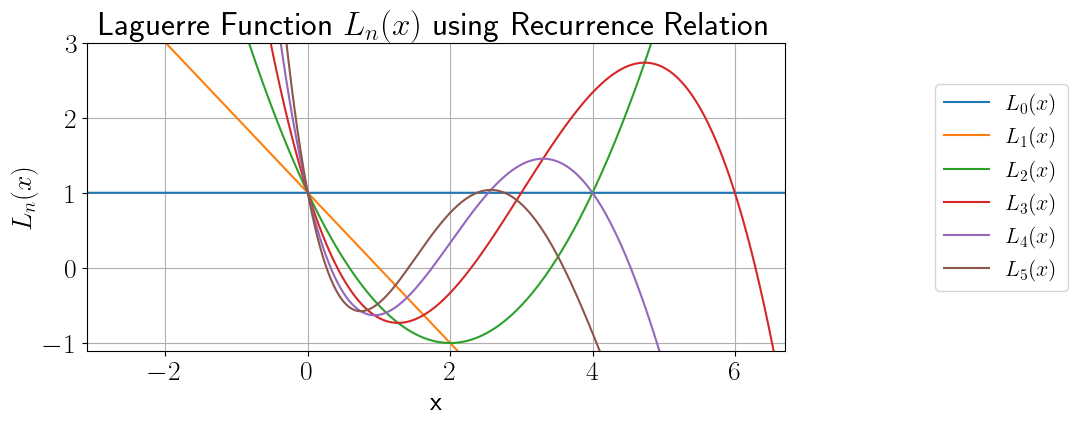

In [46]:
x = np.arange(-3.1, 6.7, 0.001) # Range of x values

for n in range(0, 5+1):
    plt.plot(x, L(n, x), label=f'$L_{n}(x)$')
plt.xlabel('x')
plt.ylim(-1.1,3.0)
plt.xlim(x.min(),x.max())
plt.ylabel(r'$L_n(x)$')
plt.title('Laguerre Function $L_n(x)$ using Recurrence Relation')
plt.legend(bbox_to_anchor=(1.2, 0.9))
plt.grid(True)
plt.show()

$ \displaystyle(n+1)L_{n+1}(x)=(2n+1-x)L_n(x)-nL_{n-1}(x)$

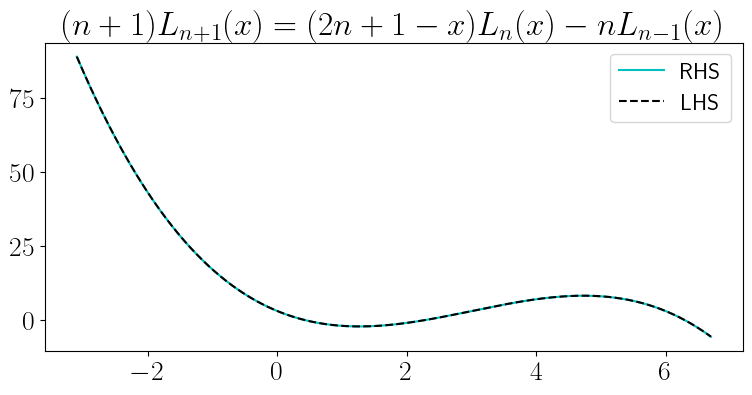

In [47]:
n = 2
LHS = (n + 1) * L(n + 1,x)
RHS = (2 * n + 1 - x) * L(n, x) - n * L(n - 1, x)
plt.plot(x, RHS,  'c-',label='RHS')
plt.plot(x, LHS, 'k--',label='LHS')
plt.title(r"$(n+1)L_{n+1}(x)=(2n+1-x)L_n(x)-nL_{n-1}(x)$")
plt.legend()
plt.show()

$xL'_n(x) = nL_n(x) − nL_{n−1}(x)$

or, $L'_n(x) = \frac{n}{x}\left[L_n(x) − L_{n−1}(x)\right]$

In [48]:
def dL(n,x):
    return n * (L(n, x) - L(n - 1, x)) / x

$L_{n−1}(x) = L'_{n−1}(x) − L'_n(x)$

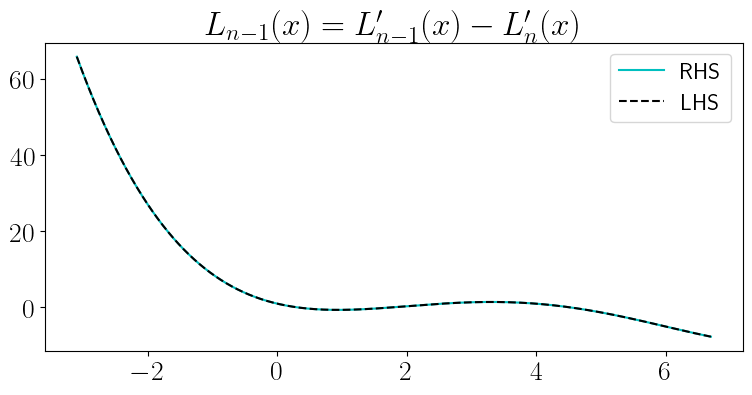

In [49]:
n = 5
LHS = L(n-1,x)
RHS = (dL(n-1,x) - dL(n, x))
plt.plot(x, RHS,  'c-',label='RHS')
plt.plot(x, LHS, 'k--',label='LHS')
plt.title(r"$L_{n−1}(x) = L'_{n−1}(x) − L'_n(x)$")
plt.legend()
plt.show()

$\text{Bessel's  differential equation}$  has the form

$\qquad\qquad\displaystyle x^2 \ddot{y} + x \dot{y} + (x^2 - n^2) y = 0 $

$ \displaystyle y=AJ_n(x)+BY_n(x)$

$\displaystyle J_n(x) = \sum_{m=0}^\infty\frac{(-1)^m}{m! \Gamma(m+n+1)} \bigg(\frac{x}{2}\bigg)^{2m+n}$

$ \displaystyle J_0(x)=\frac{\sin x}{x}$

$ \displaystyle J_1(x)=\frac{\sin x}{x^2}-\frac{\cos x}{x}$

$ \displaystyle J_2(x)=\big(\frac{3}{x^2}-1\big)\frac{\sin x}{x}-\frac{3\cos x}{x^2}$

$ \displaystyle J_3(x)=\big(\frac{15}{x^3}-\frac{6}{x}\big)\frac{\sin x}{x} - \big(\frac{15}{x^2}-1\big)\frac{\cos x}{x}$

The generating function equation for the Bessel polynomials of $J_n(x)$

$\displaystyle {e^{\frac{x}{2}\big( {h-\frac{1}{h}} \big)}=\sum_{n=-\infty}^\infty J_n(x)h^n}$

Differentiating above relation w.r.t. $h$ , we obtain

or , $\displaystyle {\frac{x}{2}\bigg(1+\frac{1}{h^2}\bigg) e^{\frac{x}{2}\big(h-\frac{1}{h}\big)}=\sum_{n}nJ_n(x)h^{n-1}}$

or , $\displaystyle {\frac{x}{2}\bigg(1+\frac{1}{h^2}\bigg) \sum_{n}J_n(x)h^n=\sum_{n}nJ_n(x)h^{n-1}}$

or , $\displaystyle \sum_{n}{\bigg(\frac{x}{2}+\frac{x}{2h^2}\bigg)J_n(x)h^n=\sum_{n}nJ_n(x)h^{n-1}}$

or , $\displaystyle \sum_{n}{\frac{x}{2} J_n(x)h^n + \sum_{n}\frac{x}{2h^2} J_n(x)h^n  =\sum_{n}nJ_n(x)h^{n-1}}$

or , $\displaystyle \sum_{n}{\frac{x}{2} J_n(x)h^n + \sum_{n}\frac{x}{2} J_n(x)h^{n-2}=\sum_{n}nJ_n(x)h^{n-1}}$

or , $\displaystyle \sum_{n}{\frac{x}{2} J_n(x)h^n + \sum_{n}\frac{x}{2} J_{n+2}(x)h^{(n+2)-2}=\sum_{n}(n+1)J_{n+1}(x)h^{(n+1)-1}}$

or , $\displaystyle \sum_{n}{\frac{x}{2} J_n(x)h^n + \sum_{n}\frac{x}{2} J_{n+2}(x)h^{n}  =\sum_{n}(n+1)J_{n+1}(x)h^{n}}$

and, on equating coefficients of  $h^n$ on each side, we obtain

or , $\displaystyle {\frac{x}{2} J_n(x) + \frac{x}{2} J_{n+2}(x)  = (n+1)J_{n+1}(x)}$

Let , $ n\rightarrow (n-1)$

or , $\displaystyle {\frac{x}{2} J_{n-1}(x) + \frac{x}{2} J_{(n-1)+2}(x)  = \{(n-1)+1\} J_{(n-1)+1}(x)}$

or , $\displaystyle {\frac{x}{2} J_{n-1}(x) + \frac{x}{2} J_{n+1}(x)  = nJ_{n}(x)}$

or , $\displaystyle {\frac{x}{2}\big( J_{n-1}(x) + J_{n+1}(x) \big) = nJ_{n}(x)}$

or , $\displaystyle {J_{n-1}(x) + J_{n+1}(x) = \frac{2n}{x}J_{n}(x)}$

or , $\displaystyle {J_{n+1}(x) = \frac{2n}{x}J_{n}(x)-J_{n-1}(x) }$

Let , $n\rightarrow(n-1)$

or , $\displaystyle {J_{(n-1)+1}(x) = 2\frac{n-1}{x}J_{n-1}(x)-J_{(n-1)-1}(x) }$  

or , $\displaystyle \boxed{J_{n}(x) = 2\frac{n-1}{x}J_{n-1}(x)-J_{n-2}(x) }$

This is Bessel Polynomials of $1^{st}$ order


$\displaystyle J_{n}(x)=\begin{cases}{\frac{\sin(x)}{x}}&n=0\\{\frac{\sin(x)}{x^2}-\frac{\cos(x)}{x}}&n=1\\{\frac{2(n-1/2)}{x}J_{n-1}(x)-J_{n-2}(x)}&n\geq 2\,.\end{cases}$

In [50]:
def J(n, x):
    if n == 0:
        return (np.sin(x) / x)                                       # J_0(x)
    elif n == 1:
        return (np.sin(x) / x**2 - np.cos(x) / x)                    # J_1(x)
    else:
        return ((2 *( n - 0.5) / x) * J(n - 1, x) - J(n - 2, x))      # J_n(x)

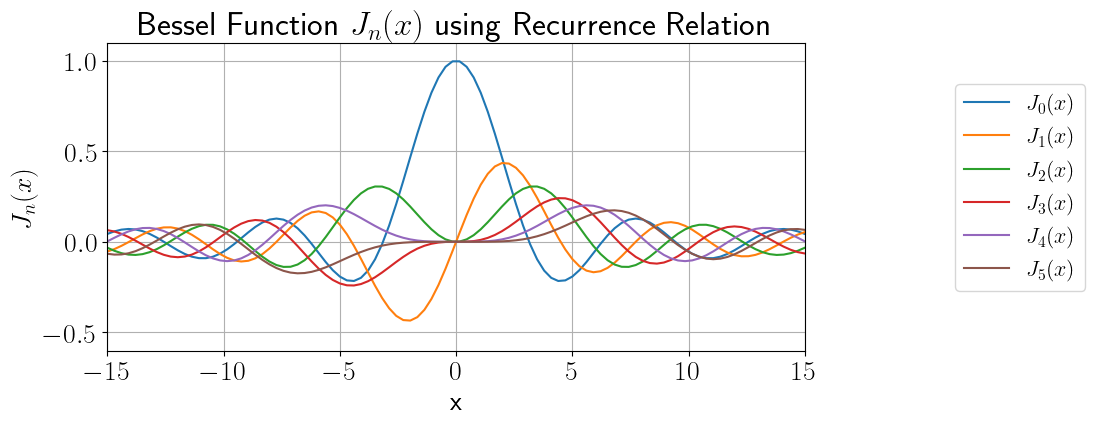

In [51]:
x = np.linspace(-15, 15, 100)  # Range of x values

for n in range(0, 5+1):
    plt.plot(x,J(n, x), label=f'$J_{n}(x)$')
plt.xlabel('x')
plt.ylim(-0.6,1.1)
plt.xlim(x.min(),x.max())
plt.ylabel('$J_n(x)$')
plt.title('Bessel Function $J_n(x)$ using Recurrence Relation')
plt.legend(bbox_to_anchor=(1.2, 0.9))
plt.grid(True)
plt.show()

$\displaystyle {J_{n+1}(x)+J_{n-1}(x) = \frac{2(n+1/2)}{x}J_{n}(x) }\qquad\qquad\qquad$                     go to pg no.-645 of Riley & Hobson for rhs *(n+1/2)

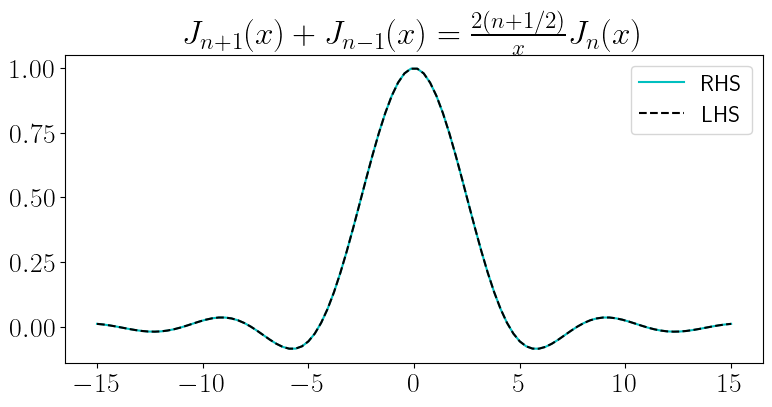

In [52]:
n = 1
LHS = J(n + 1, x) + J(n - 1, x)
RHS = 2 * (n + 0.5) * J(n, x) / x
plt.plot(x, RHS,  'c-',label='RHS')
plt.plot(x, LHS, 'k--',label='LHS')
plt.title(r"$J_{n+1}(x)+J_{n-1}(x) = \frac{2(n+1/2)}{x}J_{n}(x) $")
plt.legend()
plt.show()

$xJ′_n(x) + nJ_n (x) = xJ_{n−1} (x)$

In [53]:
def dJ(n,x):
    return np.double(J(n - 1, x) - n * J(n, x) / x)

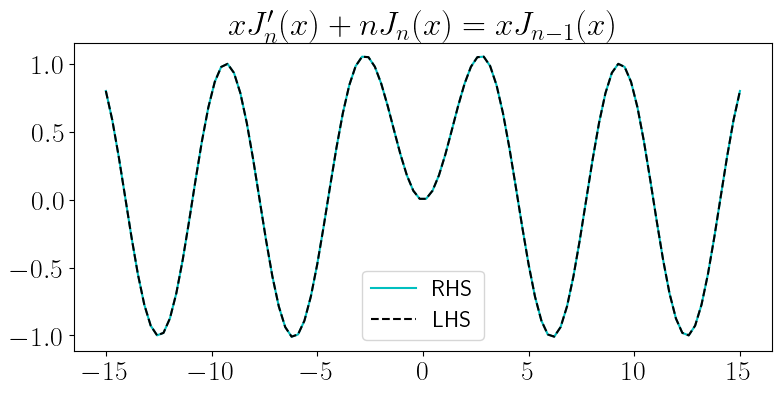

In [54]:
n = 2
LHS = x * dJ(n, x) + n * J(n, x)
RHS = x * J(n - 1, x)
plt.plot(x, RHS,  'c-',label='RHS')
plt.plot(x, LHS, 'k--',label='LHS')
plt.title(r"$xJ_n'(x) + nJ_n (x) = xJ_{n−1} (x)$")
plt.legend()
plt.show()

 
 $\displaystyle Y_n(x)=\lim_{p\rightarrow n} \frac{J_p(x)\cos(p\pi)-J_{-p}(x)}{\sin(p\pi)} \qquad\qquad\qquad n=0,1,2,3,\dots$
 
$ \displaystyle Y_0(x)=-J_{-1}(x)=-\frac{\cos x}{x}$

$ \displaystyle Y_1(x)=J_{-2}(x)=-\frac{\cos x}{x^2}-\frac{\sin x}{x}$

$ \displaystyle Y_2(x)=-J_{-3}(x)=\big(-\frac{3}{x^2}+1\big)\frac{\cos x}{x}-\frac{3\sin x}{x^2}$

$ \displaystyle Y_3(x)=J_{-4}(x)=\big(-\frac{15}{x^3}+\frac{6}{x}\big)\frac{\cos x}{x} - \big(\frac{15}{x^2}-1\big)\frac{\sin x}{x}$ 

$ \displaystyle\boxed{Y_{n}(x)=2\frac{n-1/2}{x}Y_{n-1}(x)-Y_{n-2}(x)}$

Bessel Polynomials $2^{nd}$ order

$\displaystyle Y_{n}(x)=\begin{cases}{-\frac{\cos(x)}{x}}&n=0\\{-\frac{\cos(x)}{x^2}-\frac{\sin(x)}{x}}&n=1\\{\frac{2(n-1/2)}{x}Y_{n-1}(x)-Y_{n-2}(x)}&n\geq 2\,.\end{cases}$

In [55]:
def Y(n, x):
    if n == 0:
        return (-np.cos(x) / x)                               # Y_0(x)
    elif n == 1:
        return (-np.cos(x) / x**2 - np.sin(x) / x)               # Y_1(x)
    else:
        return (( 2 *( n - 0.5) / x) * Y(n - 1, x) - Y(n - 2, x))  # Y_n(x)

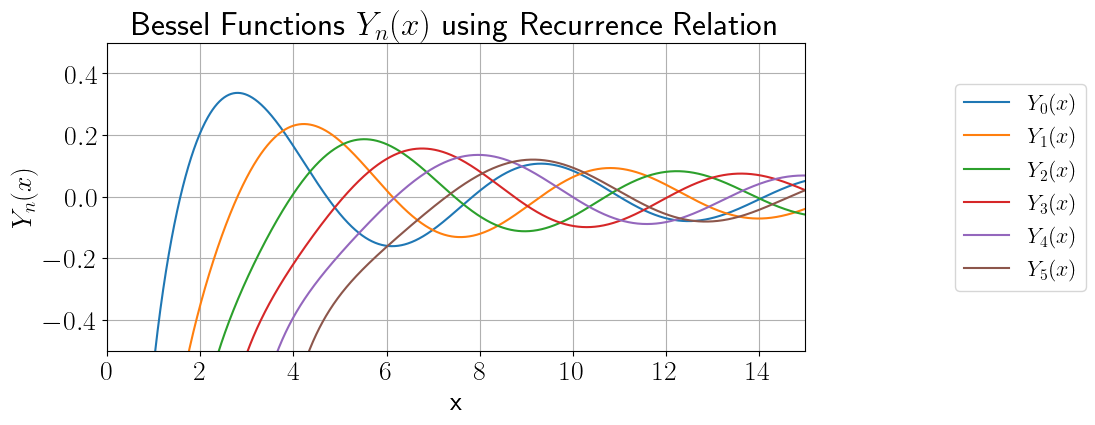

In [56]:
x = np.arange(0, 15, 0.01) # Range of x values

for n in range(0, 5+1):
    plt.plot(x, Y(n,x), label=f'$Y_{n}(x)$')
plt.ylim(-0.5,0.5)
plt.xlim(x.min(),x.max())
plt.xlabel('x')
plt.ylabel(r'$Y_n(x)$')
plt.title('Bessel Functions $Y_n(x)$ using Recurrence Relation')
plt.legend(bbox_to_anchor=(1.2, 0.9))
plt.grid(True)  
plt.show()

$\displaystyle {Y_{n+1}(x)+Y_{n-1}(x) = \frac{2(n+1/2)}{x}Y_{n}(x) }\qquad\qquad\qquad$                     go to pg no.-645 of Riley & Hobson for rhs *(n+1/2)

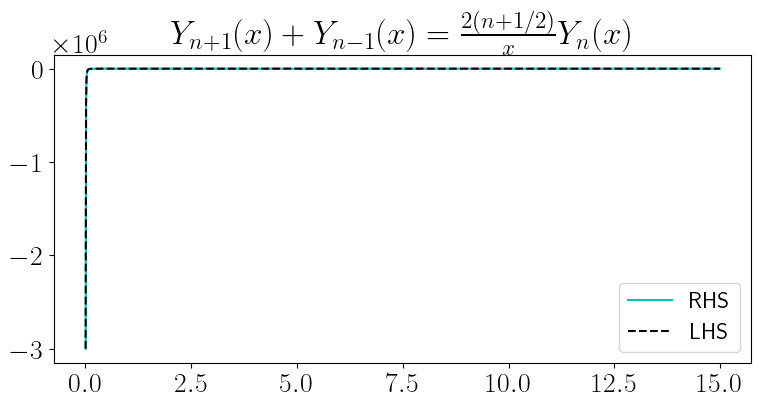

In [57]:
n = 1
LHS = Y(n + 1, x) + Y(n - 1, x)
RHS = 2 * (n + 0.5) * Y(n, x) / x 
plt.plot(x, RHS,  'c-',label='RHS')
plt.plot(x, LHS, 'k--',label='LHS')
plt.title(r"$Y_{n+1}(x)+Y_{n-1}(x) = \frac{2(n+1/2)}{x}Y_{n}(x)$")
plt.legend()
plt.show()

$xY′_n(x) + nY_n (x) = xY_{n−1} (x)$

In [58]:
def dY(n,x):
    return Y(n - 1, x) - n * Y(n, x) / x

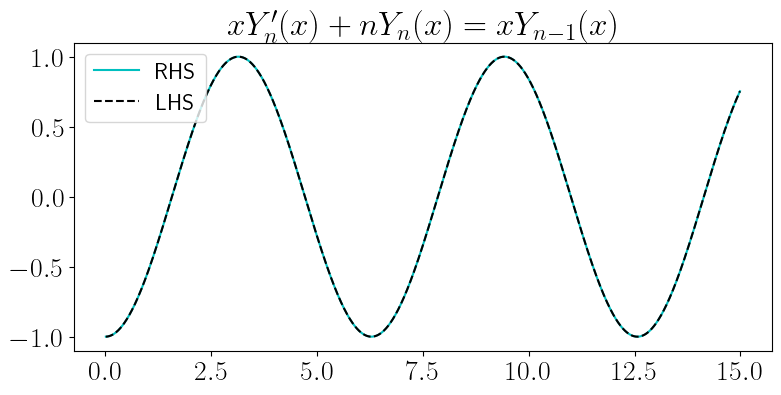

In [59]:
n = 1
LHS = x * dY(n,x) + n * Y(n,x)
RHS = x * Y(n - 1, x)
plt.plot(x, RHS,  'c-',label='RHS')
plt.plot(x, LHS, 'k--',label='LHS')
plt.title(r"$xY_n'(x) + nY_n (x) = xY_{n−1} (x)$")
plt.legend()
plt.show()

# Modified Bessel Function

## $\boxed{I_n(x)=e^{-n \pi i/2}J_n(ix)}$

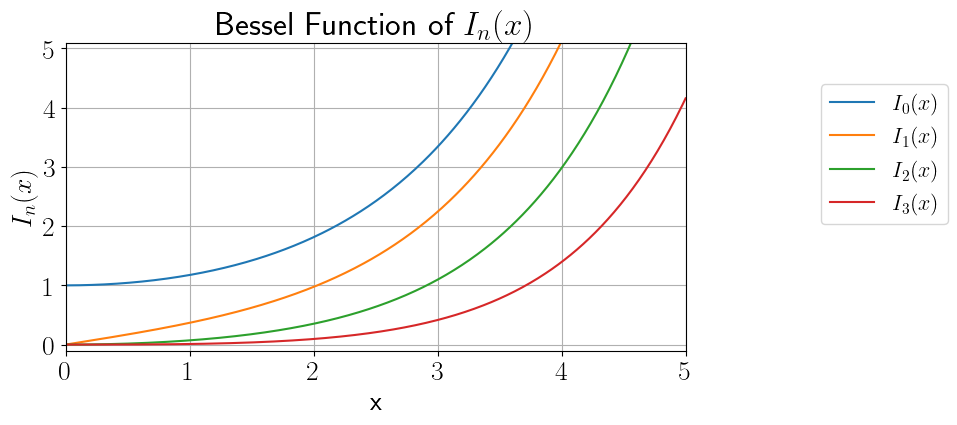

In [60]:
def I(n,x):
    return (np.exp(-1j * n * np.pi / 2) * J(n, 1j * x))

x = np.linspace(0, 5, 400)  # Range of x values

plt.figure(figsize=(8,4))
for n in range(0, 4):
    plt.plot(x,I(n, x), label=f'$I_{n}(x)$')
plt.xlabel('x')
plt.ylim(0.0,5.0)
plt.yticks([0,1,2,3,4,5])
plt.xlim(x.min(),x.max())
plt.ylabel('$I_n(x)$')
plt.title('Bessel Function of $I_n(x)$')
plt.legend(bbox_to_anchor=(1.2, 0.9))
plt.ylim([-0.1,5.1])
plt.grid(True)
plt.show()

$\boxed{K_n(x)=\int_0^\infty e^{-x\cosh t} \cosh nt \ dt}$

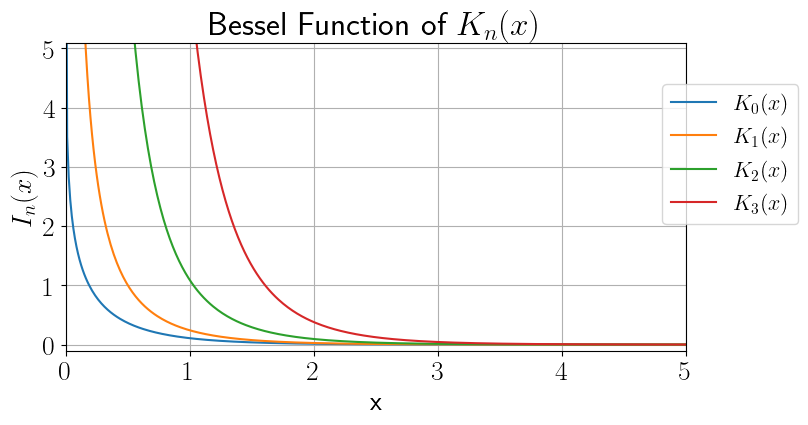

In [61]:
def K(n, x):
    I = lambda t : np.exp(-x * np.cosh(t)) * np.cosh(n * t)
    h = 0.01
    kn_sum = 0.0
    for i in range(1000):
        ti = a + i * h
        kn_sum += 0.5 * (I(ti) + I(ti + h))
    kn_sum *= h
    return kn_sum
x = np.linspace(0, 5, 400)  # Range of x values

plt.figure(figsize=(8,4))
for n in range(0, 4):
    plt.plot(x,K(n, x), label=f'$K_{n}(x)$')
plt.xlabel('x')
plt.ylim(0.0,5.0)
plt.yticks([0,1,2,3,4,5])
plt.xlim(x.min(),x.max())
plt.ylabel('$I_n(x)$')
plt.title('Bessel Function of $K_n(x)$')
plt.legend(bbox_to_anchor=(1.2, 0.9))
plt.ylim([-0.1,5.1])
plt.grid(True)
plt.show()

$\text{Hyper-Geometric Function differential equation}$ has the form in the range [0,1]

$\qquad\qquad\displaystyle x(1-x)\ddot{y}+[c-(a+b+1)x]\dot{y}-aby=0$

$\displaystyle{ {}_2F_1(x,a,b,c)=1+\frac{a\cdot b}{c}\frac{x}{1!}+\frac{a\cdot(a+1)\cdot b\cdot(b+1)}{c\cdot(c+1)}\frac{x^2}{2!}+\frac{a\cdot(a+1)\cdot(a+2)\cdot b\cdot(b+1)\cdot(b+2)}{c\cdot(c+1)\cdot(c+2)}\frac{x^3}{3!}+\dots=\sum_{k=0}^\infty\frac{(a)_k\cdot (b)_k}{(c)_k} \frac{x^k}{k!}}$

In [62]:
def h2f1(x,a,b,c,n=1):
    
    s,t=1,1
    while(abs(t)>1e-12):
        t  = t*(a*b/c)*(x/n)
        s += t
        n += 1
        a += 1
        b += 1
        c += 1
    return s

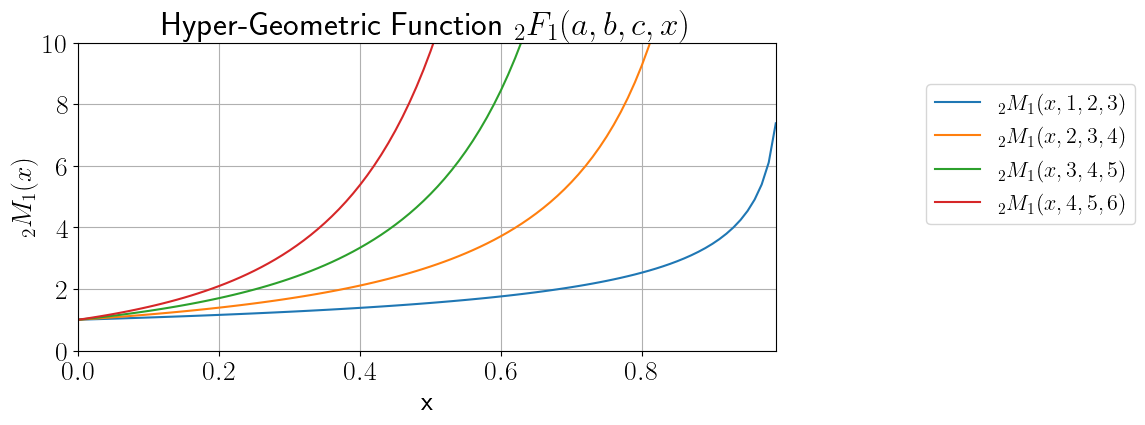

In [63]:
x = np.arange(0, 1., 0.01)
A = np.arange(1,5,1)
B = A + 1
C = B + 1

for a,b,c in zip(A,B,C):
    y = [h2f1(i, a, b, c) for i in x]
    plt.plot(x, y, label=r'${}_2M_1(x,%i,%i,%i)$'%(a,b,c))
plt.xlabel('x')
plt.ylim(0.0,10.0)
plt.xlim(x.min(),x.max())
plt.ylabel(r'${}_2M_1(x)$')
plt.legend(bbox_to_anchor=(1.2, 0.9))
plt.title('Hyper-Geometric Function ${}_2F_1(a,b,c,x)$')
plt.grid(True)
plt.show()

By making the substitution  $ z = \frac{1-x}{2}$ and suitable choices $a,b,$ and $c$                                      
convert the Hyper-Geometric equation,    
$\qquad \displaystyle z(1-z)\ddot{u}+[c-(a+b+1)z]\dot{u}-abu=0$                                                                
into the Legendre equation ,                                                                                                  
$\qquad \displaystyle(1-x^2)\ddot{y} -2x\dot{y} + n(n+1)y = 0$                                                                     
Hence, using the Hyper-Geometric series , generte the Legendre Polynomials $P_l(x)$ for the integer values $l=0,1,2,3,...$  
Ans :- Let, start from  Legendre equation ,                                                                                                  
$\qquad\qquad\qquad \displaystyle(1-x^2)\ddot{y} -2x\dot{y} + n(n+1)y = 0$                                                               
$\qquad$Changing the independent variable,                                                                                         
$\qquad\qquad\qquad z = \frac{1-x}{2}$                                                                                                         
$\qquad$ or, $\qquad\qquad x = 1-2z$                                                                                                         
$\qquad$ Now , at $z = 0 , \quad x=1$                                                                                                         
$\qquad$ this transforms the equation into,                                                                                                         
$\qquad\qquad z(1-z)\ddot{u}+(1-2z)\dot{u}+n(n+1)u=0$                                                                                                         
$\qquad$ this is the Hyper-Geometric equation with $ a = -n, b=n+1, c=1$                                                                                                         
$\qquad$ So it has the polynomil solution near $z=0$                                                                                                         
$\qquad\qquad u={}_2F_1(-n,n+1,1,z)$                                                                                                         
$\qquad$ Now , on replacing $z$ to $\frac{1-x}{2}$ ,                                                                                                         
$\qquad$ we get the general solution of Legendre equation as,                                                                                                         
$\qquad\qquad\boxed{ y = {}_2F_1\left(-n,n+1,1,\frac{1-x}{2}\right)}$

Riley & Hobson, Page-643 Q.18.12

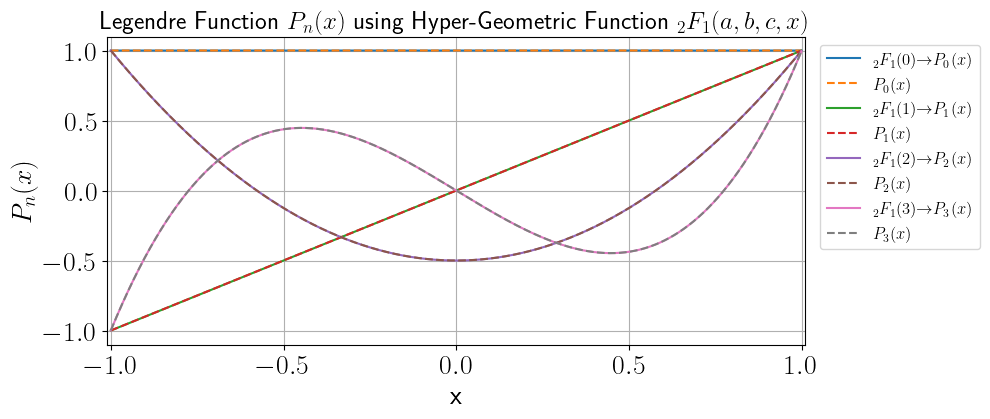

In [64]:
x = np.arange(-1., 1., 0.001)

for n in range(0, 4):
    a = -n
    b = (n+1)
    c = 1
    H_P = [h2f1(0.5*(1-i),a,b,c) for i in x]
    plt.plot(x, H_P, label=r'$ {}_2F_1$'+f'$ ({n})$'+r'$ \rightarrow$'+f'$ P_{n}(x)$')
    plt.plot(x, P(n, x),'--', label=f'$P_{n}(x)$')
plt.xlabel('x')
plt.xlim(x.min()-0.01,x.max()+0.01)
plt.ylabel(r'$P_n(x)$')
plt.title('Legendre Function $P_n(x)$ using Hyper-Geometric Function ${}_2F_1(a,b,c,x)$',fontsize=18)
plt.legend(bbox_to_anchor=(1.01, 1), fontsize=12)
plt.grid(True)
plt.show()

1. Start with Chebyshev polynomial:
   
   $T_n(\cos\theta) = \cos(n\theta)$

2. Using the double-angle formula:
   
   $T_{2n}(\cos\theta) = \cos(2n\theta) = T_n(\cos 2\theta) = T_n(2\cos^2\theta - 1)$

3. Let $\cos\theta = x$:

   $T_{2n}(x) = T_n(2x^2 - 1)$

4. Now, consider the hypergeometric equation with $a = -n, b = n$, and $c = \frac{1}{2}$:

   $z(1-z)\ddot{u} + \left(\frac{1}{2}-z\right)\dot{u} + n^2u = 0, \quad u(0) = 1, \dot{u}(0) = -2n^2$

5. The solution to this equation is:

   $u(z) = {}_2F_1(-n, n, \frac{1}{2}, z)$

6. Change the variable $z$ to $x^2$:

   $(1-x^2)\ddot{u} - x\dot{u} + 4n^2u = 0, \quad u(0) = 1, \dot{u}(0) = 0$

7. The solution to this equation is:

   $u(x^2) = {}_2F_1(-n, n, \frac{1}{2}, x^2)$

To satisfy the Chebyshev polynomial $T_{2n}(x)$, we should have:

$(1-x^2)T_{2n}''(x) - xT_{2n}'(x) + n^2T_{2n}(x) = 0$

In this case, you need to satisfy the boundary conditions $T_{2n}(0) = 1$ and $T_{2n}'(0) = 0$.

The solution that satisfies these conditions is:

$\boxed{T_{2n}(x) = (-1)^n {}_2F_1\left(-n, n, \frac{1}{2}, x^2\right)}$

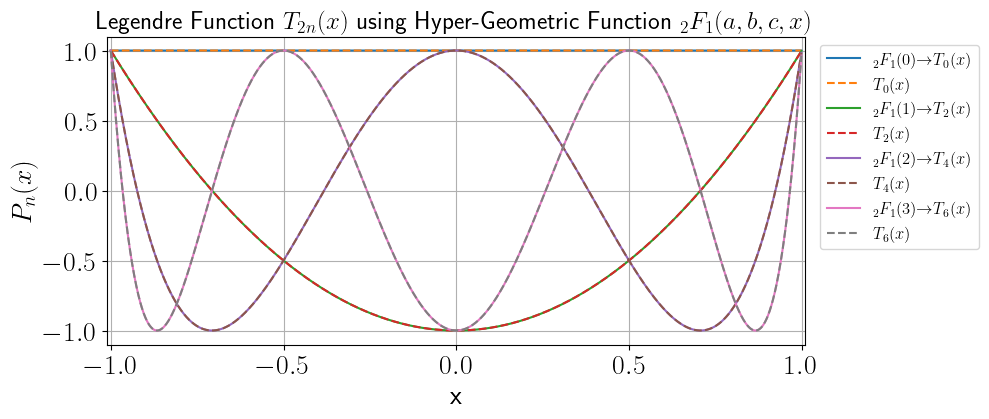

In [65]:
x = np.arange(-1., 1., 0.001)

for n in range(0, 4):
    a = -n
    b = n
    c = 1/2
    H_P = [(-1)**n*h2f1(i**2,a,b,c) for i in x]
    plt.plot(x, H_P, label=r'$ {}_2F_1$'+f'$ ({n})$'+r'$ \rightarrow$'+f'$ T_{2*n}(x)$')
    plt.plot(x, T(2*n, x),'--', label=f'$T_{2*n}(x)$')
plt.xlabel('x')
plt.xlim(x.min()-0.01,x.max()+0.01)
plt.ylabel(r'$P_n(x)$')
plt.title('Legendre Function $T_{2n}(x)$ using Hyper-Geometric Function ${}_2F_1(a,b,c,x)$',fontsize=18)
plt.legend(bbox_to_anchor=(1.01, 1), fontsize=12)
plt.grid(True)
plt.show()

1. Start with the Chebyshev polynomial:

   $T_n(\cos\theta) = \cos(n\theta)$

2. Let $\cos\theta = x$, then:

   $T_n(\cos\theta) = T_n(x) = \cos(n\cos^{-1}x)$

3. Now, consider the hypergeometric equation with $a = n, b = -n$, and $c = \frac{1}{2}$:

   $z(1-z)\ddot{u} + \left(\frac{1}{2} - z\right)\dot{u} + n^2u = 0, \quad u(0) = 1, \dot{u}(0) = -2n^2$

4. The solution to this equation is:

   $u(z) = {}_2F_1(n, -n, \frac{1}{2}, z)$

5. Change the variable from $z$ to $z = \frac{1-x}{2}$:

   $(1-x^2)\ddot{u} - x\dot{u} + n^2u = 0, \quad u(0) = 1, \dot{u}(0) = 0$

6. The solution to this equation is:

   $u\left(\frac{1-x}{2}\right) = {}_2F_1(n, -n, \frac{1}{2}, x^2)$

7. To satisfy the Chebyshev polynomial $T_n(x)$ with boundary conditions $T_n(0) = 1$ and $T_n'(0) = 0$:

   $(1-x^2)T_n''(x) - xT_n'(x) + n^2T_n(x) = 0$

8. The solution that satisfies these conditions is:

   $\boxed{T_n(x) = {}_2F_1\left(n, -n, \frac{1}{2}, \frac{1}{2}(1-x)\right)}$

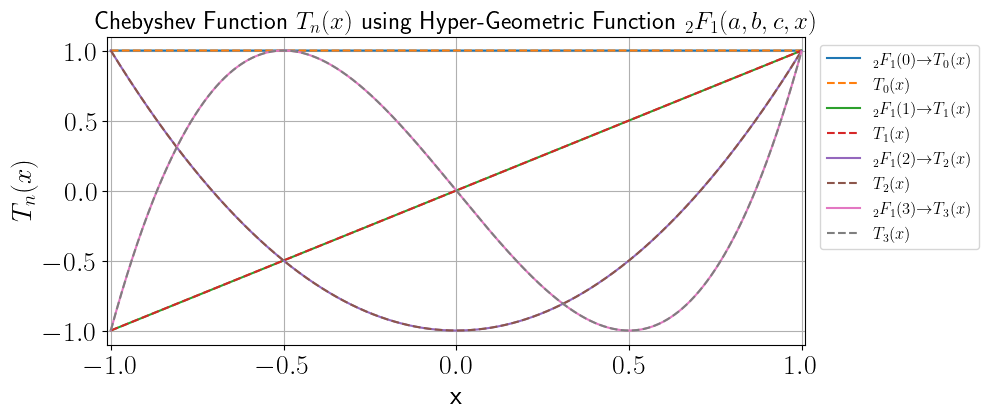

In [66]:
x = np.arange(-1., 1., 0.001)

for n in range(0, 4):
    a = n
    b = -n
    c = 1/2
    H_P = [h2f1(0.5*(1-i),a,b,c) for i in x]
    plt.plot(x, H_P, label=r'$ {}_2F_1$'+f'$ ({n})$'+r'$ \rightarrow$'+f'$ T_{n}(x)$')
    plt.plot(x, T(n, x),'--', label=f'$T_{n}(x)$')
plt.xlabel('x')
plt.xlim(x.min()-0.01,x.max()+0.01)
plt.ylabel(r'$T_n(x)$')
plt.title('Chebyshev Function $T_n(x)$ using Hyper-Geometric Function ${}_2F_1(a,b,c,x)$',fontsize=18)
plt.legend(bbox_to_anchor=(1.01, 1), fontsize=12)
plt.grid(True)
plt.show()

 $\text{Confluent Hyper-Geometric Function differential equation}$ has the form in the range [$0, \infty$]

$\qquad\qquad\displaystyle x \ddot{y} + (b-x) \dot{y} - ay = 0 $

$\displaystyle{ {}_1F_1(x,a,b)=1+\frac{a}{b}\frac{x}{1!}+\frac{a\cdot(a+1)}{b\cdot(b+1)}\frac{x^2}{2!}+\frac{a\cdot(a+1)\cdot(a+2)}{b\cdot(b+1)\cdot(b+2)}\frac{x^3}{3!}+\dots=\sum_{k=0}^\infty\frac{(a)_k}{(b)_k} \frac{x^k}{k!}}$

In [14]:
def h1f1(x,a,b,n=1):
    
    s,t=1,1
    while(abs(t)>1e-12):
        t  = t*(a/b)*(x/n)
        s += t
        n += 1
        a += 1
        b += 1
    return s

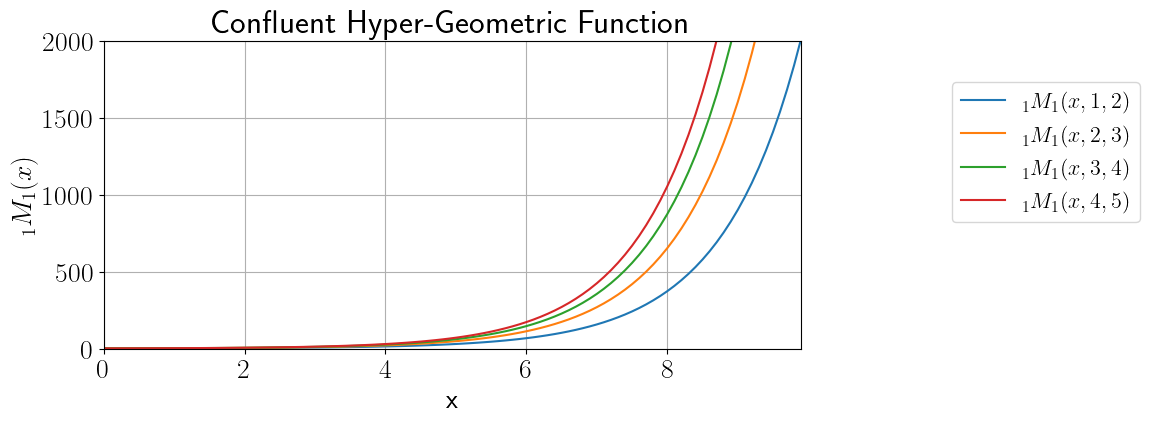

In [15]:
x = np.arange(0, 10, 0.1)
A = np.arange(1,5,1)
B = A+1

for a,b in zip(A,B):
    y = [h1f1(i, a, b) for i in x]
    plt.plot(x, y, label=r'${}_1M_1(x,%i,%i)$'%(a,b))
plt.xlabel('x')
plt.ylim(0.0,2000.)
plt.xlim(x.min(),x.max())
plt.ylabel(r'${}_1M_1(x)$')
plt.legend(bbox_to_anchor=(1.2, 0.9))
plt.title('Confluent Hyper-Geometric Function')
plt.grid(True)
plt.show()